In [2]:
# pip install h2o

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.281-b09, mixed mode)
  Starting server from C:\Users\Admin\.conda\envs\austral\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: h:\tmp\tmp6pbyly7m
  JVM stdout: h:\tmp\tmp6pbyly7m\h2o_Admin_started_from_python.out
  JVM stderr: h:\tmp\tmp6pbyly7m\h2o_Admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,America/Argentina/Buenos_Aires
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.5
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_Admin_0h4k9t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.761 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [2]:
from pycaret.datasets import get_data
import numpy as np
df = get_data('bank')

# Separo entre train y test
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Convierto los dataframe de pandas a dataframe de H20
train = h2o.H2OFrame(df_train) 
test = h2o.H2OFrame(df_test) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
train

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no


In [5]:
# Defino cuales columnas son las variables de entrenamiento y cual es el target. 
x = train.columns
y = "deposit"
x.remove(y)

In [6]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [7]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
18:13:10.636: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_1_20220916_181310


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,79.0,79.0,82792.0,7.0,7.0,7.0,38.0,109.0,78.67088




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.042955861520189265
RMSE: 0.2072579588826187
LogLoss: 0.1472386937688042
Mean Per-Class Error: 0.1463961443926978
AUC: 0.9680467440531241
AUCPR: 0.8415631250326105
Gini: 0.9360934881062482

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4166748281374327: 


,,no,yes,Error,Rate
0,no,31116.0,947.0,0.0295,(947.0/32063.0)
1,yes,1122.0,3140.0,0.2633,(1122.0/4262.0)
2,Total,32238.0,4087.0,0.057,(2069.0/36325.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.416675,0.752186,177.0
1,max f2,0.193386,0.801577,263.0
2,max f0point5,0.557595,0.800269,128.0
3,max accuracy,0.469370,0.944253,159.0
4,max precision,0.959414,1.000000,0.0
5,max recall,0.004553,1.000000,393.0
6,max specificity,0.959414,1.000000,0.0
7,max absolute_mcc,0.416675,0.720227,177.0
8,max min_per_class_accuracy,0.175026,0.901787,271.0
9,max mean_per_class_accuracy,0.151339,0.902860,281.0



Gains/Lift Table: Avg response rate: 11,73 %, avg score: 11,72 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010021,0.882185,8.522994,8.522994,1.000000,0.912308,1.000000,0.912308,0.085406,0.085406,752.299390,752.299390,0.085406
1,2,0.020014,0.828180,8.405597,8.464376,0.986226,0.853853,0.993122,0.883121,0.083998,0.169404,740.559729,746.437633,0.169248
2,3,0.030007,0.775711,8.194283,8.374428,0.961433,0.801974,0.982569,0.856097,0.081886,0.251290,719.428339,737.442795,0.250698
3,4,0.040000,0.725900,7.912532,8.259033,0.928375,0.751710,0.969030,0.830018,0.079071,0.330361,691.253153,725.903332,0.328958
4,5,0.050021,0.681826,7.422497,8.091450,0.870879,0.703869,0.949367,0.804747,0.074378,0.404740,642.249743,709.144990,0.401870
5,6,0.100014,0.463439,5.641321,6.866723,0.661894,0.571255,0.805670,0.688033,0.282027,0.686767,464.132085,586.672258,0.664748
6,7,0.150007,0.282398,2.881673,5.538617,0.338106,0.369095,0.649844,0.581740,0.144064,0.830831,188.167305,453.861652,0.771323
7,8,0.200000,0.159423,1.595715,4.553027,0.187225,0.215307,0.534205,0.490144,0.079775,0.910605,59.571472,355.302675,0.805063
8,9,0.300014,0.056705,0.642802,3.249499,0.075420,0.097546,0.381263,0.359266,0.064289,0.974894,-35.719782,224.949896,0.764590
9,10,0.400000,0.027062,0.166611,2.478883,0.019548,0.038863,0.290847,0.279176,0.016659,0.991553,-83.338861,147.888315,0.670186




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.062030846063604275
RMSE: 0.2490599246438581
LogLoss: 0.19799638584493148
Mean Per-Class Error: 0.1650038126633404
AUC: 0.9362865288398005
AUCPR: 0.6275571836212528
Gini: 0.8725730576796009

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25965199308496273: 


,,no,yes,Error,Rate
0,no,29509.0,2554.0,0.0797,(2554.0/32063.0)
1,yes,1067.0,3195.0,0.2504,(1067.0/4262.0)
2,Total,30576.0,5749.0,0.0997,(3621.0/36325.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.259652,0.638298,232.0
1,max f2,0.133748,0.742392,284.0
2,max f0point5,0.496288,0.613732,145.0
3,max accuracy,0.496288,0.909814,145.0
4,max precision,0.980207,1.000000,0.0
5,max recall,0.004112,1.000000,395.0
6,max specificity,0.980207,1.000000,0.0
7,max absolute_mcc,0.259652,0.590734,232.0
8,max min_per_class_accuracy,0.136078,0.868821,283.0
9,max mean_per_class_accuracy,0.096184,0.872851,304.0



Gains/Lift Table: Avg response rate: 11,73 %, avg score: 11,64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010021,0.865287,6.766883,6.766883,0.793956,0.905775,0.793956,0.905775,0.067809,0.067809,576.688252,576.688252,0.065469
1,2,0.020014,0.807953,6.104624,6.436209,0.716253,0.835646,0.755158,0.870758,0.061004,0.128813,510.462373,543.620860,0.123261
2,3,0.030007,0.752129,6.433334,6.435251,0.754821,0.778072,0.755046,0.839891,0.064289,0.193102,543.333424,543.525136,0.184774
3,4,0.040000,0.707337,5.681996,6.247067,0.666667,0.728558,0.732966,0.812077,0.056781,0.249883,468.199593,524.706710,0.237782
4,5,0.050021,0.668351,5.619556,6.121358,0.659341,0.688233,0.718217,0.787267,0.056312,0.306194,461.955642,512.135775,0.290226
5,6,0.100014,0.458498,4.669812,5.395785,0.547907,0.562627,0.633086,0.674978,0.233458,0.539653,366.981219,439.578474,0.498078
6,7,0.150007,0.282881,3.665451,4.819113,0.430066,0.369403,0.565425,0.573138,0.183247,0.722900,266.545057,381.911254,0.649045
7,8,0.200000,0.161919,2.304400,4.190521,0.270374,0.217159,0.491672,0.484156,0.115204,0.838104,130.439978,319.052088,0.722925
8,9,0.300014,0.057608,1.107309,3.162689,0.129920,0.100217,0.371077,0.356165,0.110746,0.948850,10.730887,216.268924,0.735084
9,10,0.400000,0.027165,0.302716,2.447794,0.035518,0.039659,0.287199,0.277049,0.030267,0.979118,-69.728353,144.779446,0.656097




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.902436,0.004797,0.900619,0.903510,0.909153,0.895939,0.902959
1,auc,0.936280,0.002522,0.938136,0.937946,0.937323,0.932032,0.935965
2,err,0.097564,0.004797,0.099381,0.096490,0.090847,0.104061,0.097041
3,err_count,708.800000,34.852547,722.000000,701.000000,660.000000,756.000000,705.000000
4,f0point5,0.592942,0.017818,0.596085,0.589695,0.616980,0.567096,0.594855
5,f1,0.639624,0.013267,0.649855,0.638100,0.636163,0.620101,0.653903
6,f2,0.695205,0.027051,0.714286,0.695163,0.656577,0.684036,0.725965
7,lift_top_group,6.561851,0.457532,6.475652,7.142623,6.827572,5.923842,6.439565
8,logloss,0.198067,0.003625,0.199151,0.193569,0.197161,0.203467,0.196987
9,max_per_class_error,0.261388,0.042730,0.235160,0.260766,0.329070,0.265476,0.216471



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-09-16 18:14:00,8.373 sec,0.0,0.321813,0.361571,0.500000,0.117330,1.000000,0.882670
1,,2022-09-16 18:14:00,8.529 sec,5.0,0.278140,0.268234,0.928992,0.683258,8.032630,0.086662
2,,2022-09-16 18:14:00,8.685 sec,10.0,0.257590,0.231924,0.939288,0.709300,8.101527,0.087433
3,,2022-09-16 18:14:00,8.842 sec,15.0,0.246615,0.212757,0.943344,0.727521,8.335675,0.088176
4,,2022-09-16 18:14:00,8.998 sec,20.0,0.239551,0.199967,0.946253,0.743023,8.476164,0.084184
5,,2022-09-16 18:14:01,9.154 sec,25.0,0.234637,0.190554,0.948144,0.753227,8.499579,0.079422
6,,2022-09-16 18:14:01,9.310 sec,30.0,0.230227,0.182495,0.951135,0.765443,8.499579,0.080385
7,,2022-09-16 18:14:01,9.467 sec,35.0,0.226586,0.175726,0.954294,0.776375,8.499579,0.076118
8,,2022-09-16 18:14:01,9.592 sec,40.0,0.223452,0.170841,0.956903,0.788085,8.522994,0.071218
9,,2022-09-16 18:14:01,9.670 sec,45.0,0.220927,0.166689,0.958575,0.796133,8.522994,0.068988



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,3608.423584,1.000000,0.371084
1,month,1538.247437,0.426293,0.158191
2,poutcome,1361.554199,0.377327,0.140020
3,job,520.588928,0.144270,0.053537
4,day,487.888916,0.135208,0.050174
5,age,471.396606,0.130638,0.048478
6,pdays,443.435638,0.122889,0.045602
7,housing,322.438934,0.089357,0.033159
8,contact,274.711365,0.076131,0.028251
9,balance,189.247528,0.052446,0.019462


In [8]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_1_20220916_181310,0.936287,0.197996,0.627557,0.165004,0.24906,0.0620308
GBM_1_AutoML_1_20220916_181310,0.935715,0.196535,0.627725,0.177184,0.248769,0.0618861
GBM_5_AutoML_1_20220916_181310,0.93535,0.199169,0.623548,0.16204,0.249654,0.062327
GBM_3_AutoML_1_20220916_181310,0.934704,0.200842,0.617965,0.17181,0.25094,0.0629711
GBM_4_AutoML_1_20220916_181310,0.934134,0.202667,0.613685,0.157452,0.252139,0.063574
DRF_1_AutoML_1_20220916_181310,0.930202,0.204337,0.612975,0.166656,0.251077,0.0630396
XRT_1_AutoML_1_20220916_181310,0.928996,0.216469,0.607816,0.175727,0.254218,0.0646267
GLM_1_AutoML_1_20220916_181310,0.906383,0.240828,0.550829,0.202818,0.266819,0.0711922
DeepLearning_1_AutoML_1_20220916_181310,0.892094,0.279592,0.52181,0.238934,0.277895,0.0772258


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_2_AutoML_1_20220916_181310,0.936287,0.197996,0.627557,0.165004,0.24906,0.0620308,1884,0.022353,GBM
GBM_1_AutoML_1_20220916_181310,0.935715,0.196535,0.627725,0.177184,0.248769,0.0618861,2972,0.026806,GBM
GBM_5_AutoML_1_20220916_181310,0.93535,0.199169,0.623548,0.16204,0.249654,0.062327,1760,0.01851,GBM
GBM_3_AutoML_1_20220916_181310,0.934704,0.200842,0.617965,0.17181,0.25094,0.0629711,1747,0.019608,GBM
GBM_4_AutoML_1_20220916_181310,0.934134,0.202667,0.613685,0.157452,0.252139,0.063574,2228,0.016627,GBM
DRF_1_AutoML_1_20220916_181310,0.930202,0.204337,0.612975,0.166656,0.251077,0.0630396,2737,0.024465,DRF
XRT_1_AutoML_1_20220916_181310,0.928996,0.216469,0.607816,0.175727,0.254218,0.0646267,2550,0.023611,DRF
GLM_1_AutoML_1_20220916_181310,0.906383,0.240828,0.550829,0.202818,0.266819,0.0711922,1253,0.001305,GLM
DeepLearning_1_AutoML_1_20220916_181310,0.892094,0.279592,0.52181,0.238934,0.277895,0.0772258,1261,0.006509,DeepLearning


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_1_20220916_181310


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21571789489442367: 


,,no,yes,Error,Rate
0,no,7088.0,771.0,0.0981,(771.0/7859.0)
1,yes,208.0,819.0,0.2025,(208.0/1027.0)
2,Total,7296.0,1590.0,0.1102,(979.0/8886.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

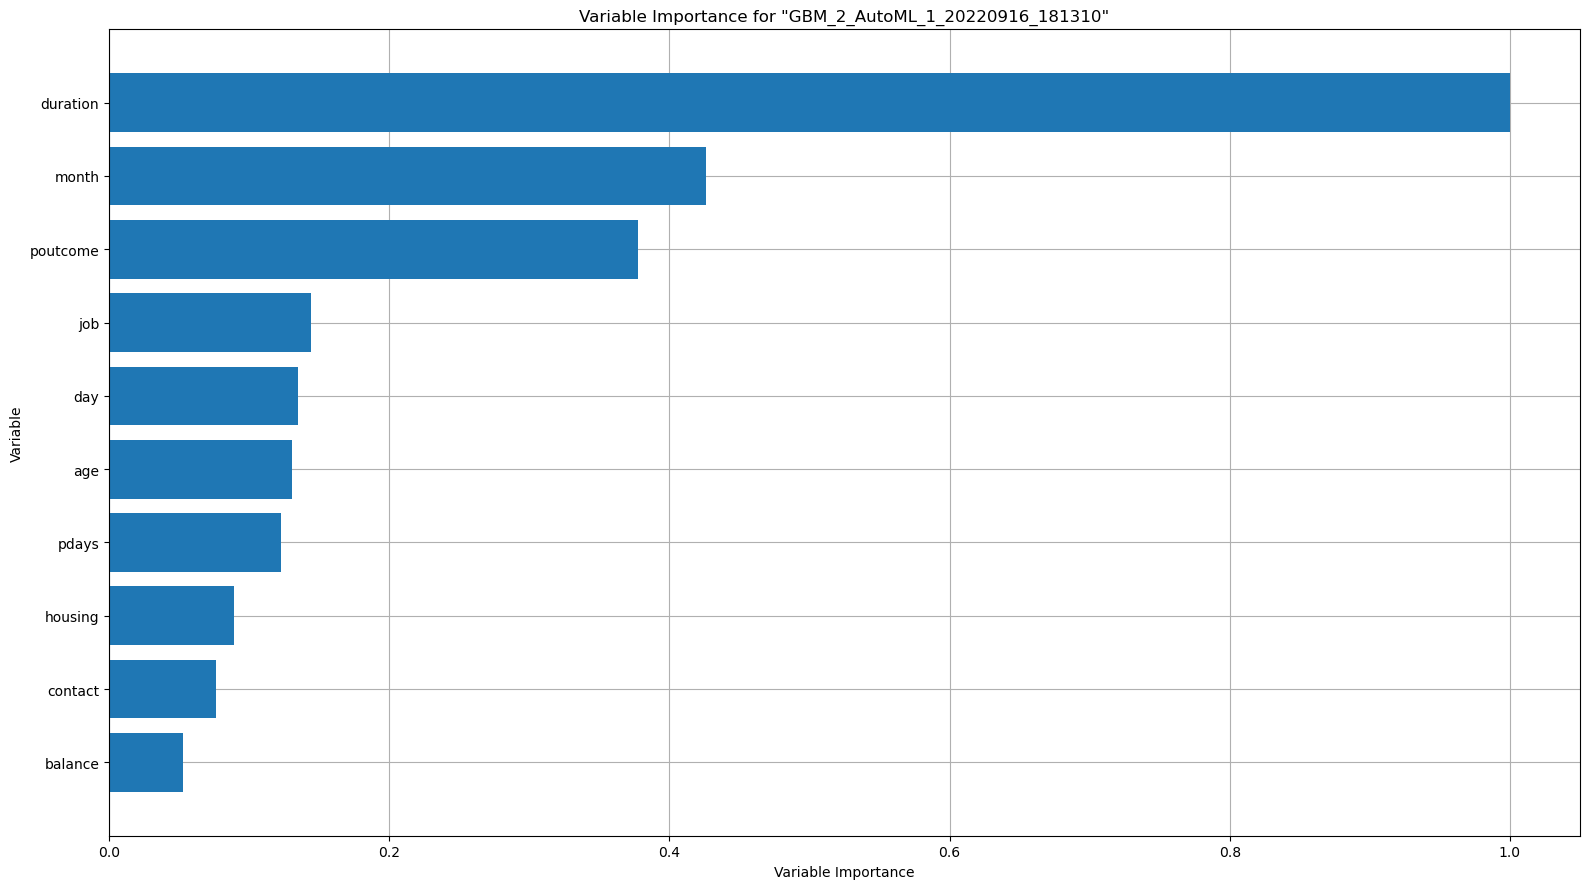

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

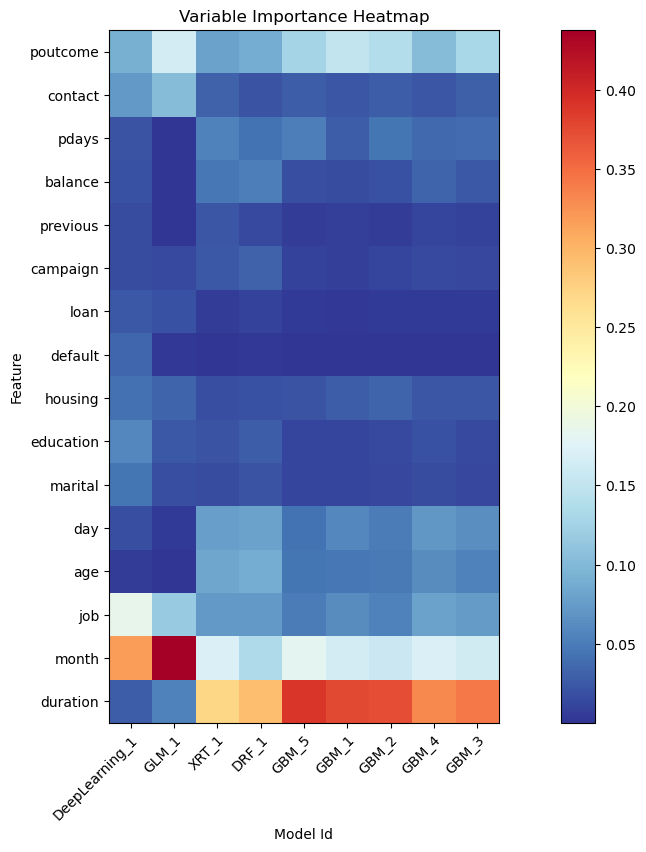

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

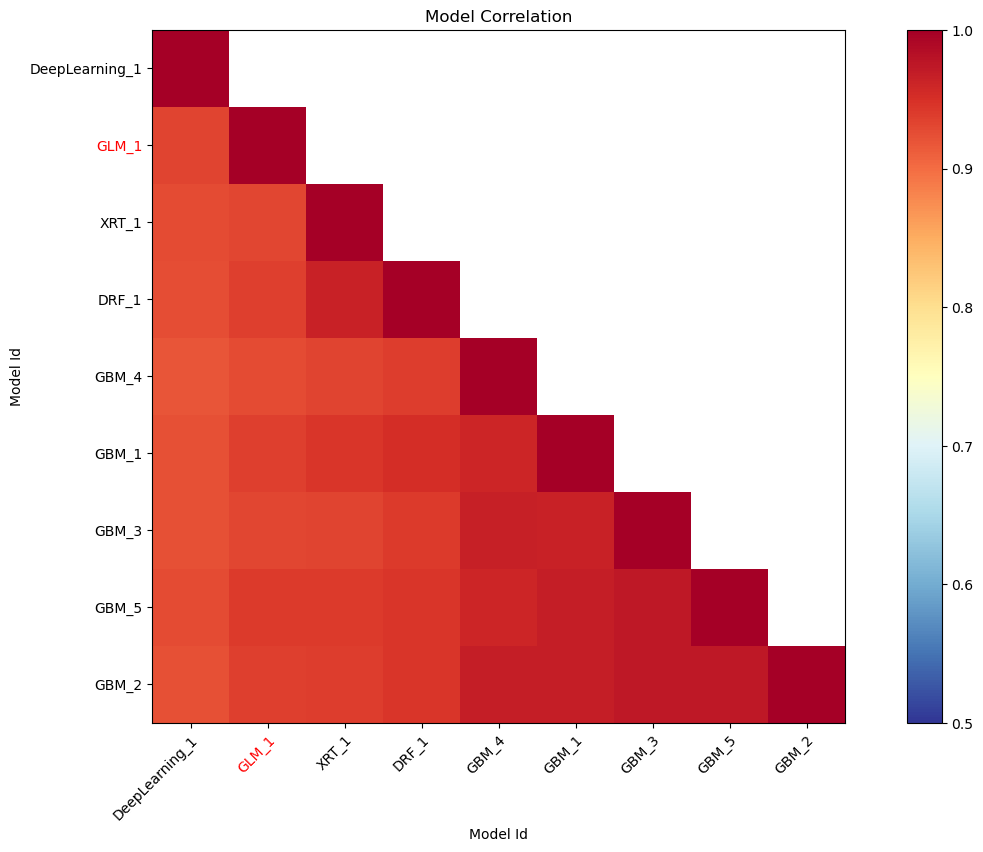

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

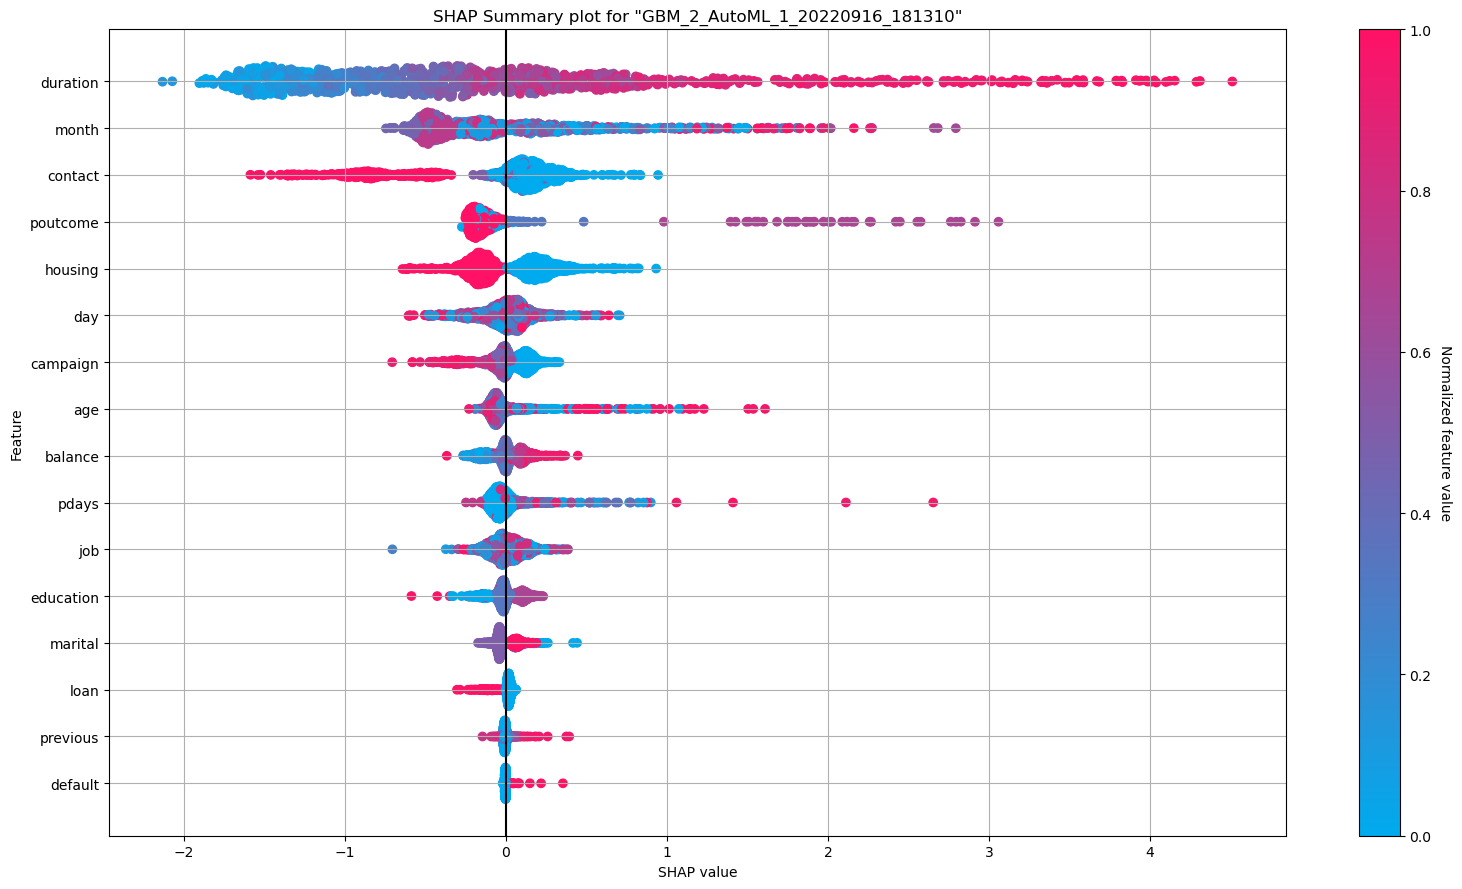

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

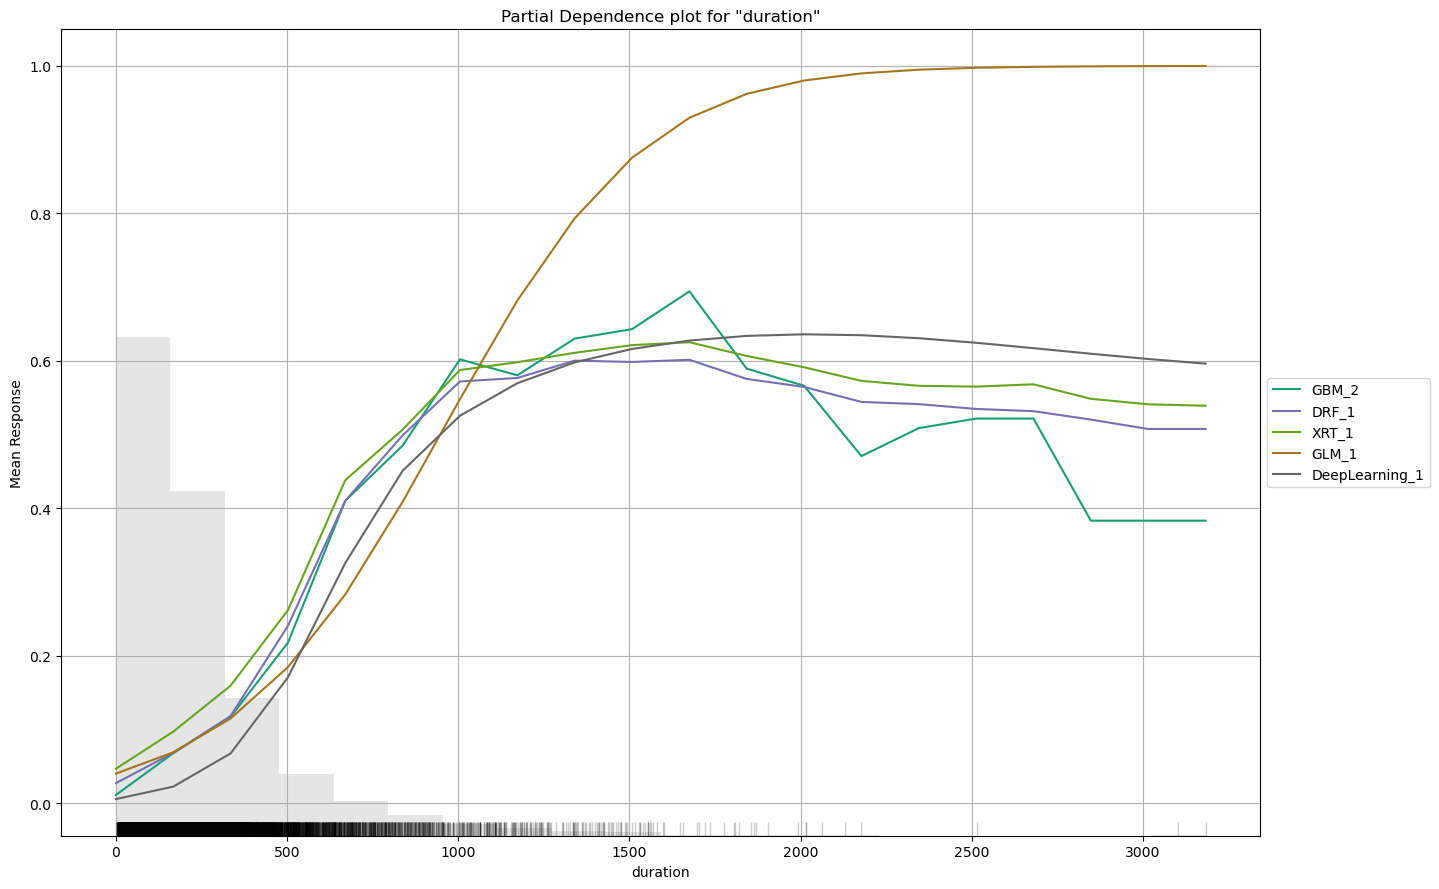

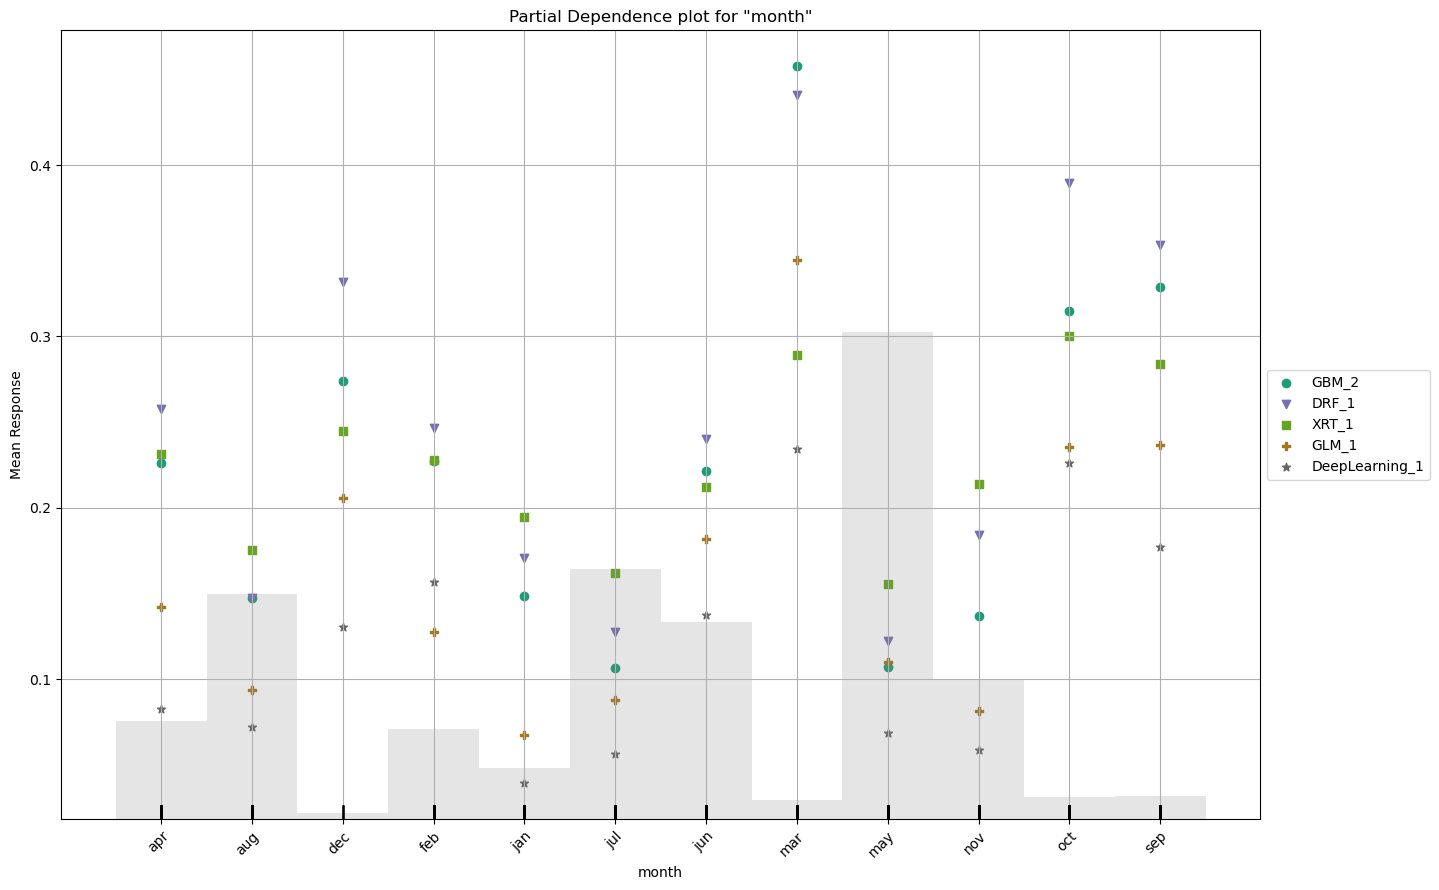

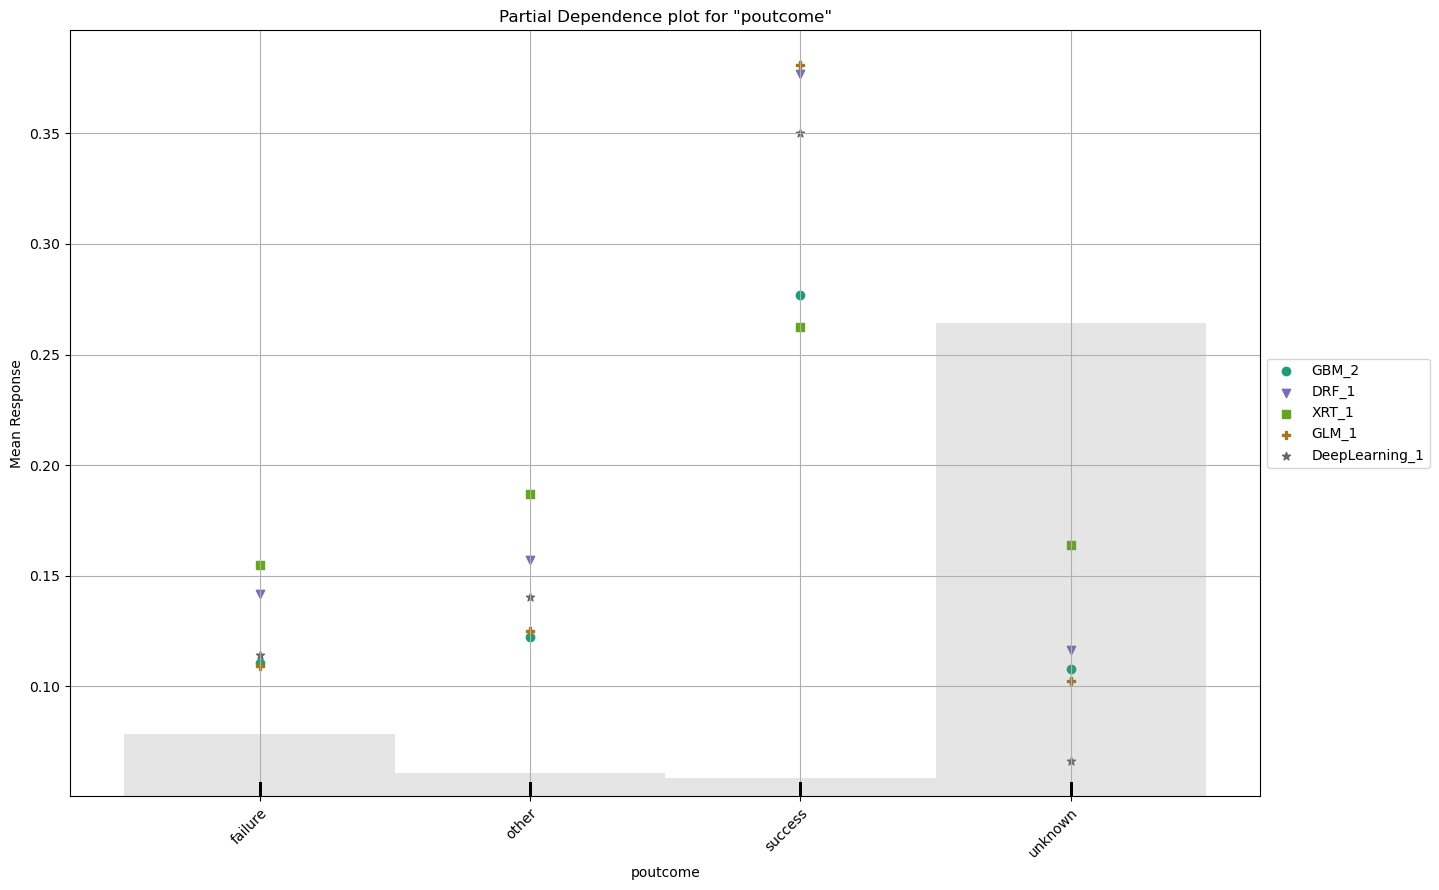

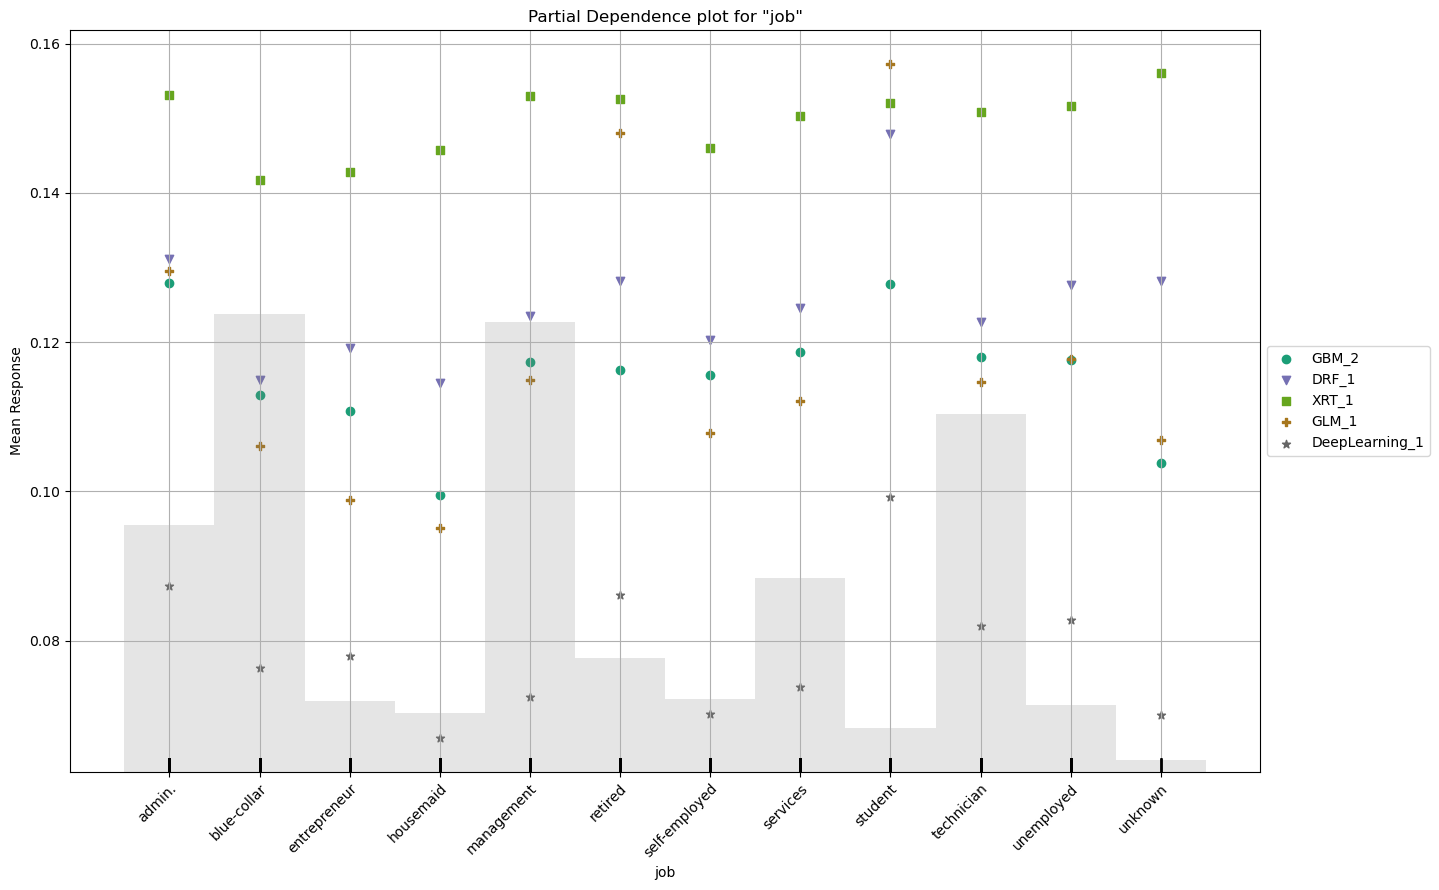

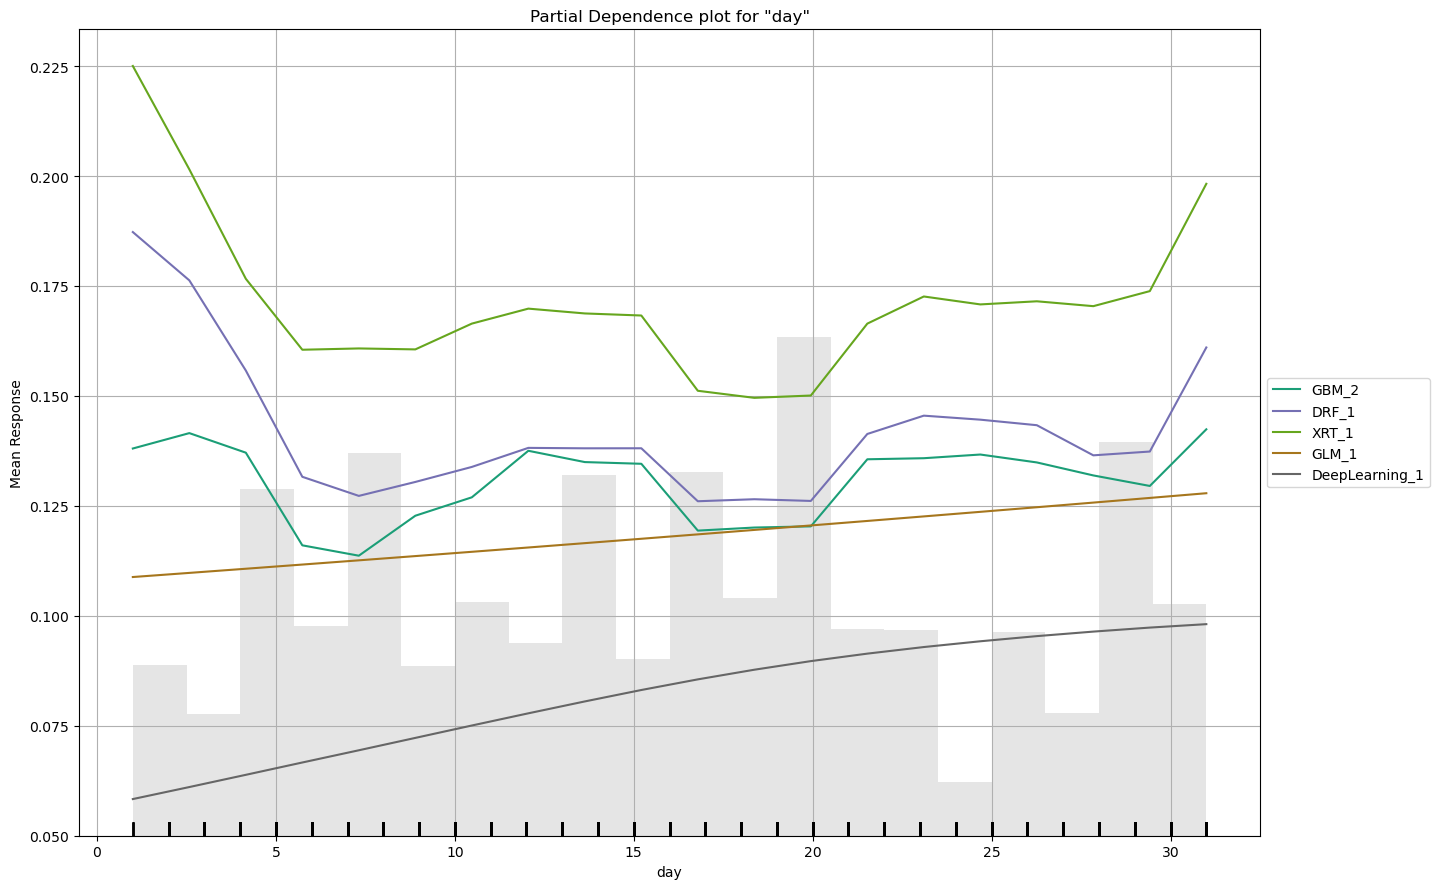

In [9]:
# Descripcion de todos los modelos entrenados
exa = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_1_20220916_181310


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21571789489442367: 


,,no,yes,Error,Rate
0,no,7088.0,771.0,0.0981,(771.0/7859.0)
1,yes,208.0,819.0,0.2025,(208.0/1027.0)
2,Total,7296.0,1590.0,0.1102,(979.0/8886.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

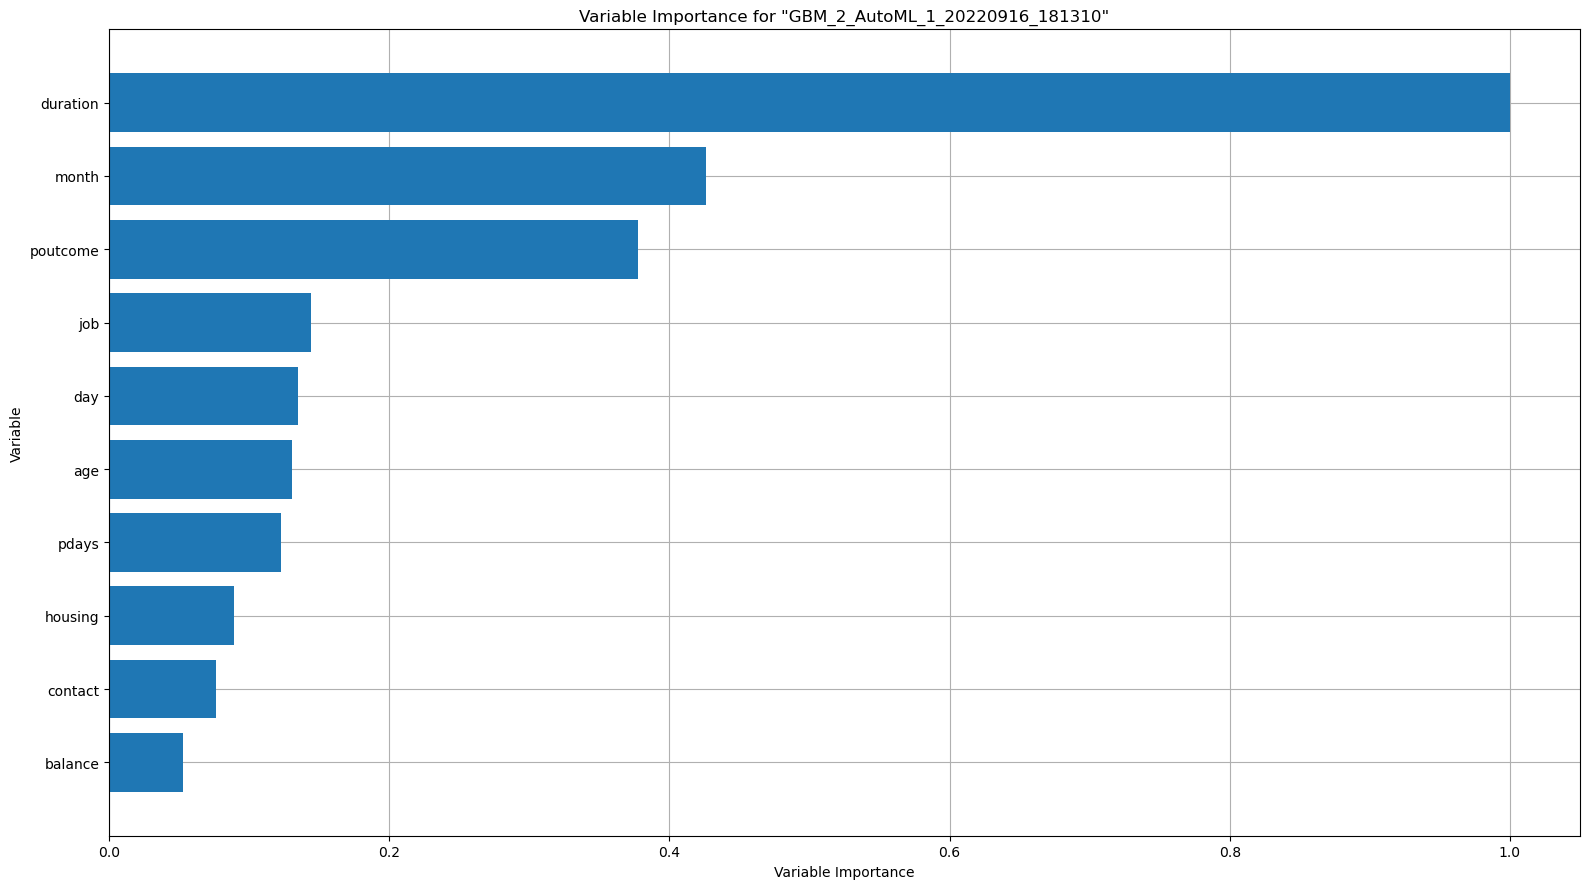

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

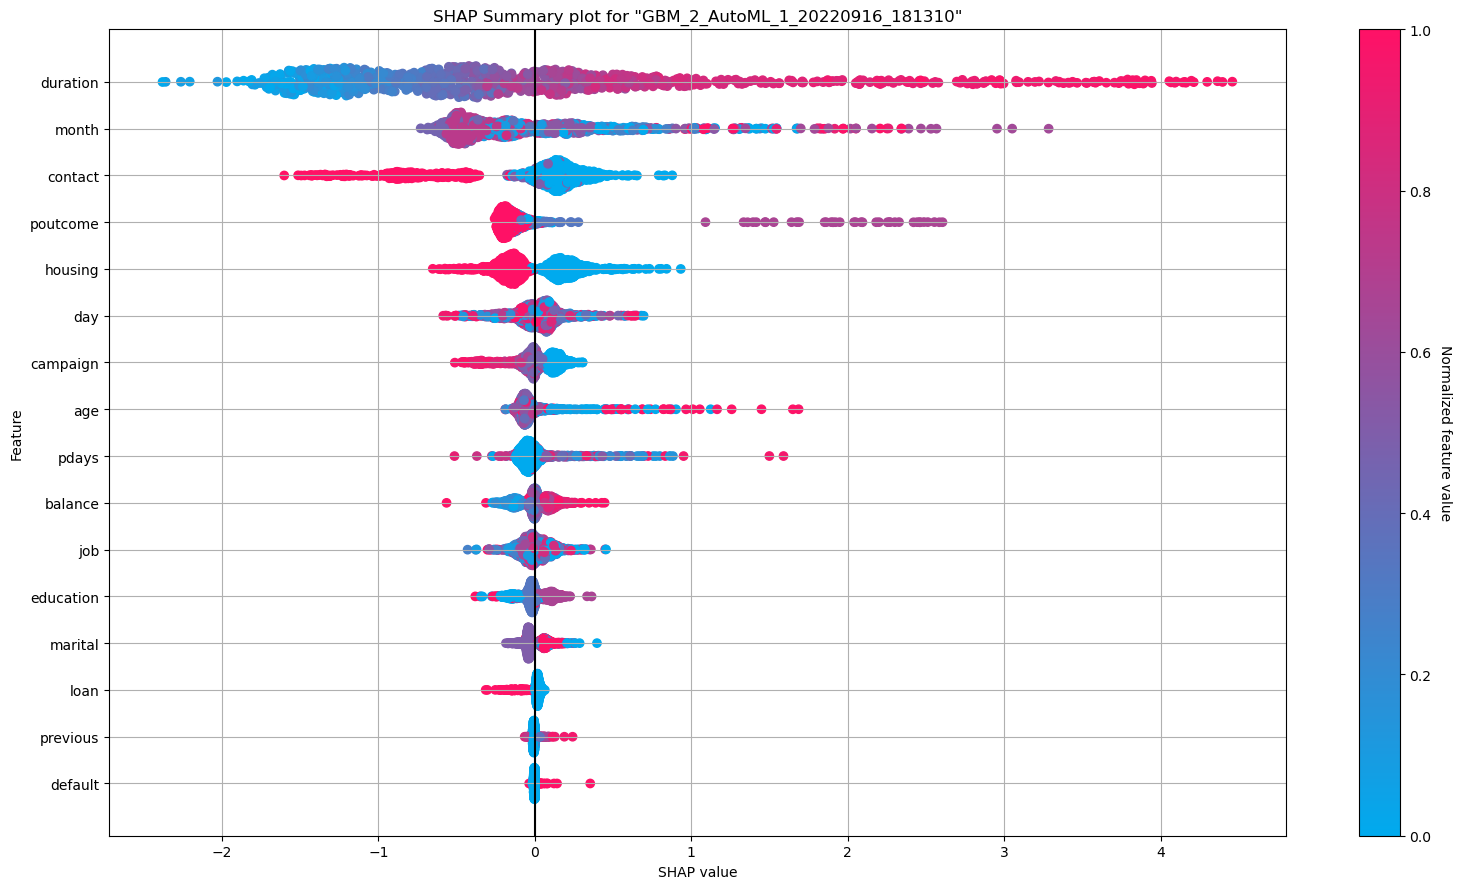

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

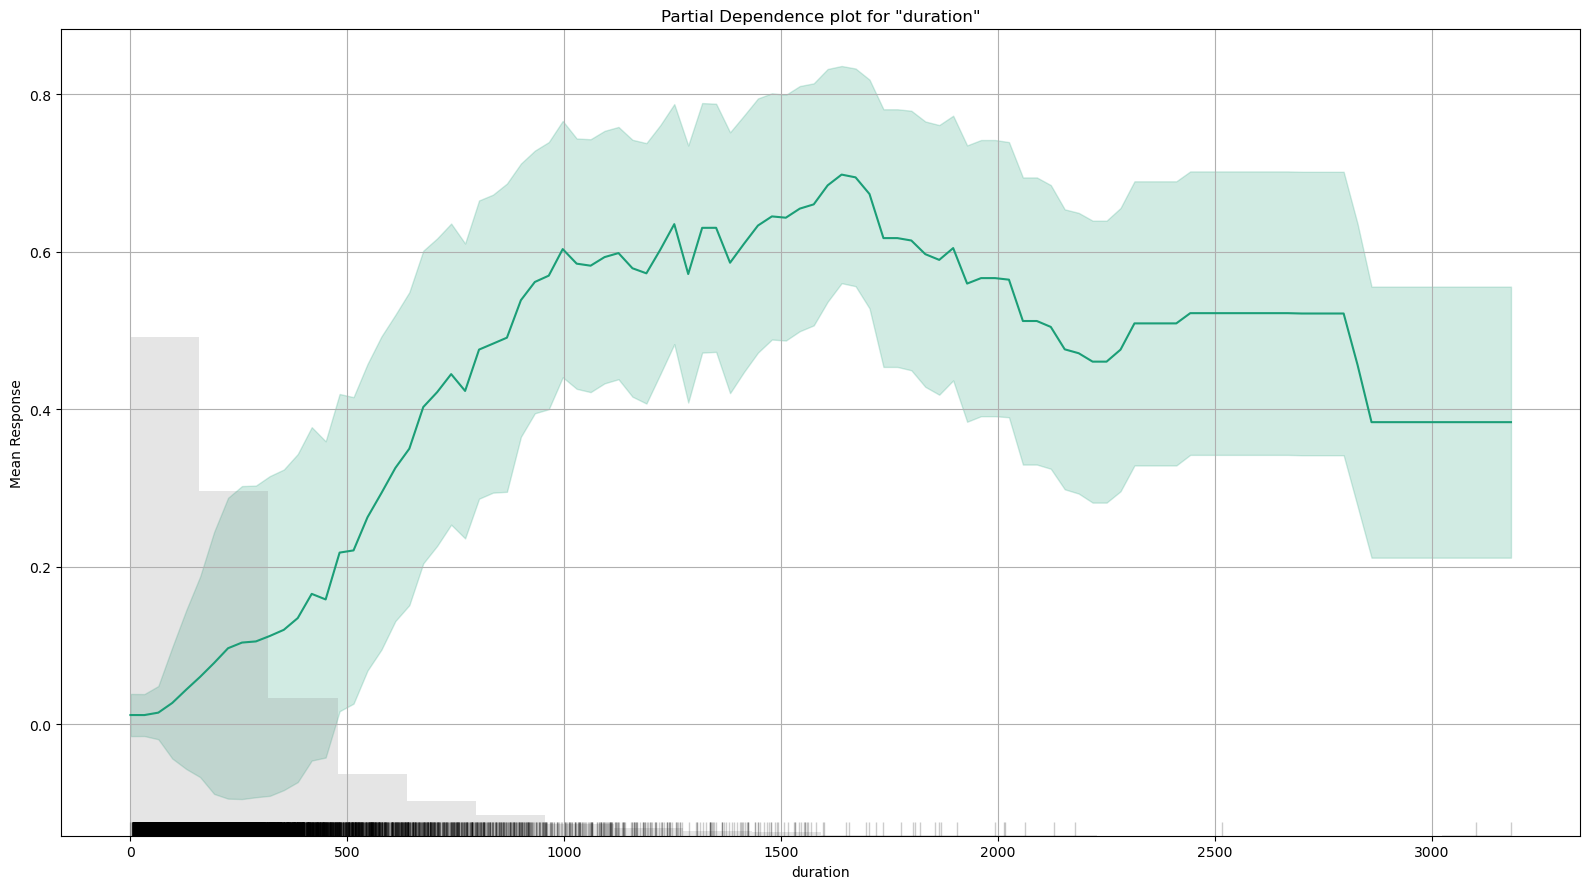

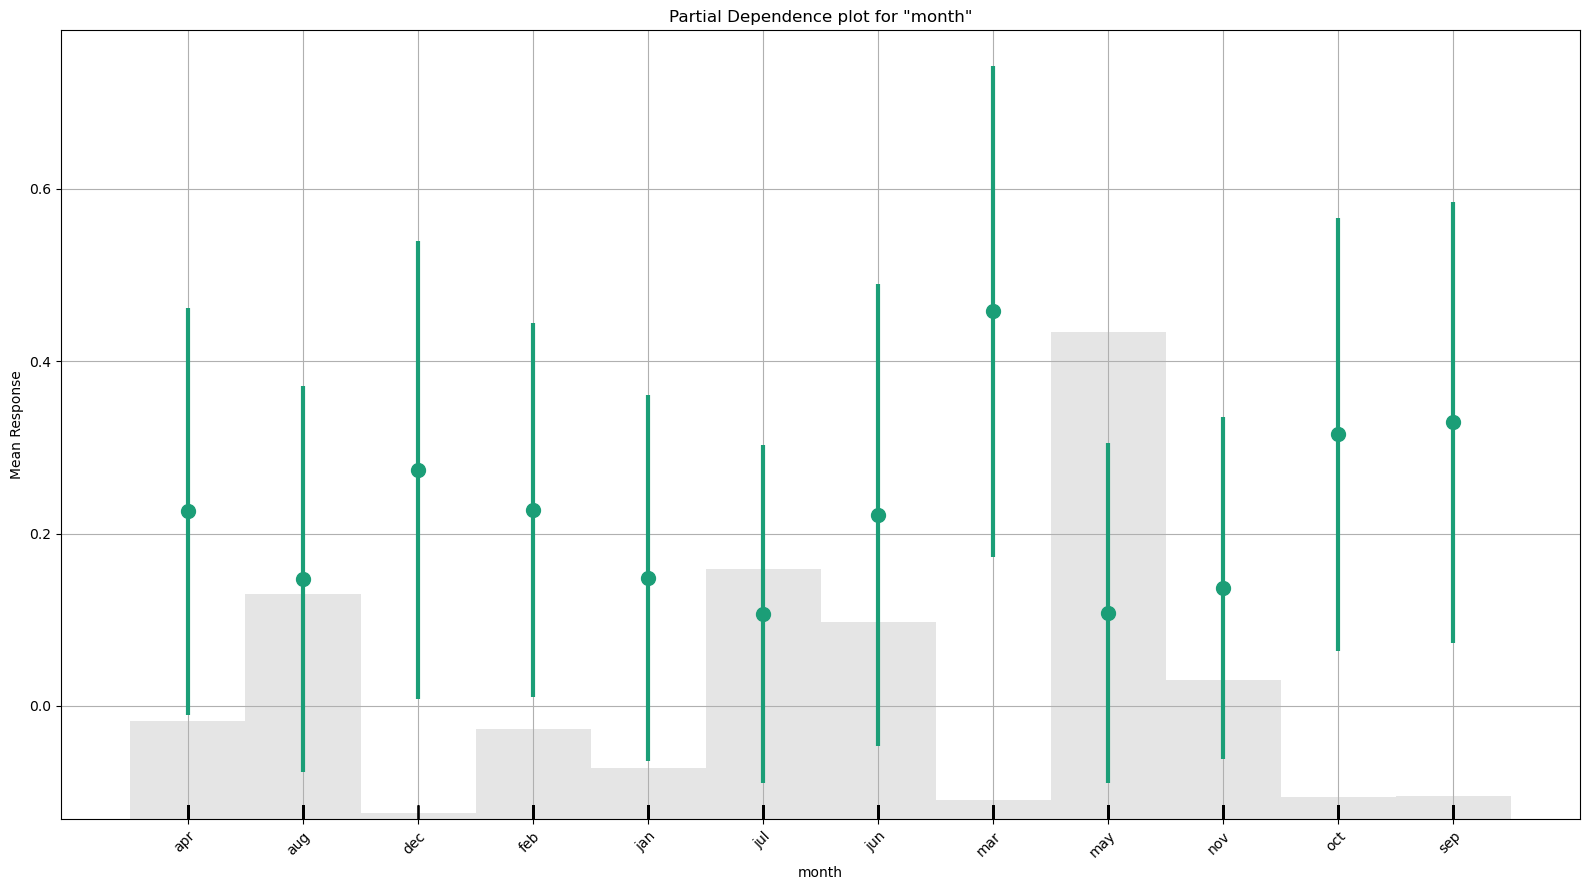

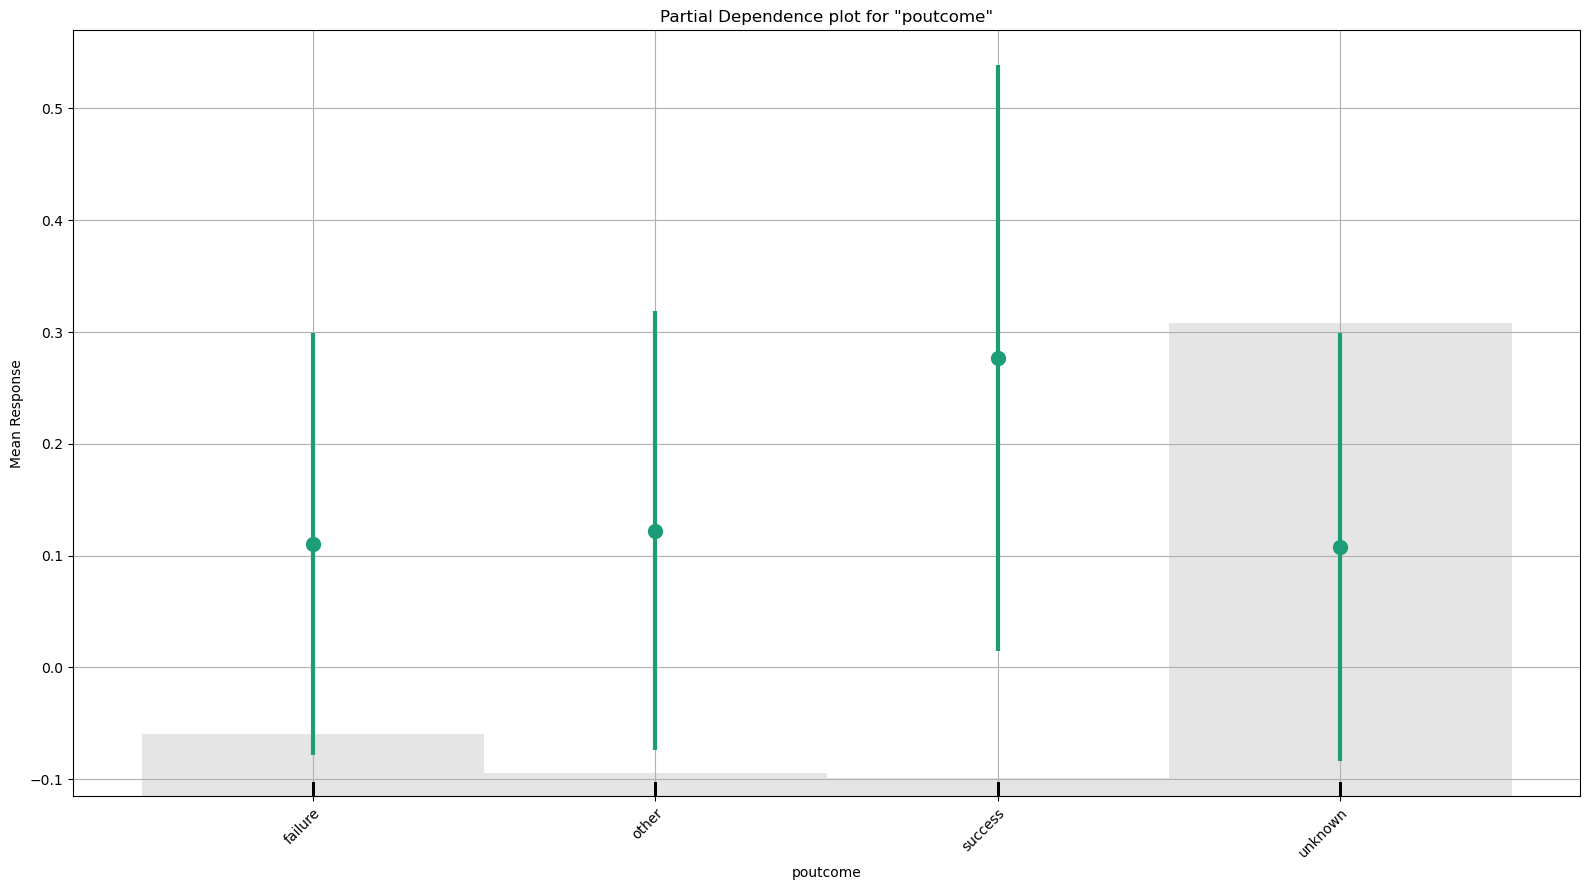

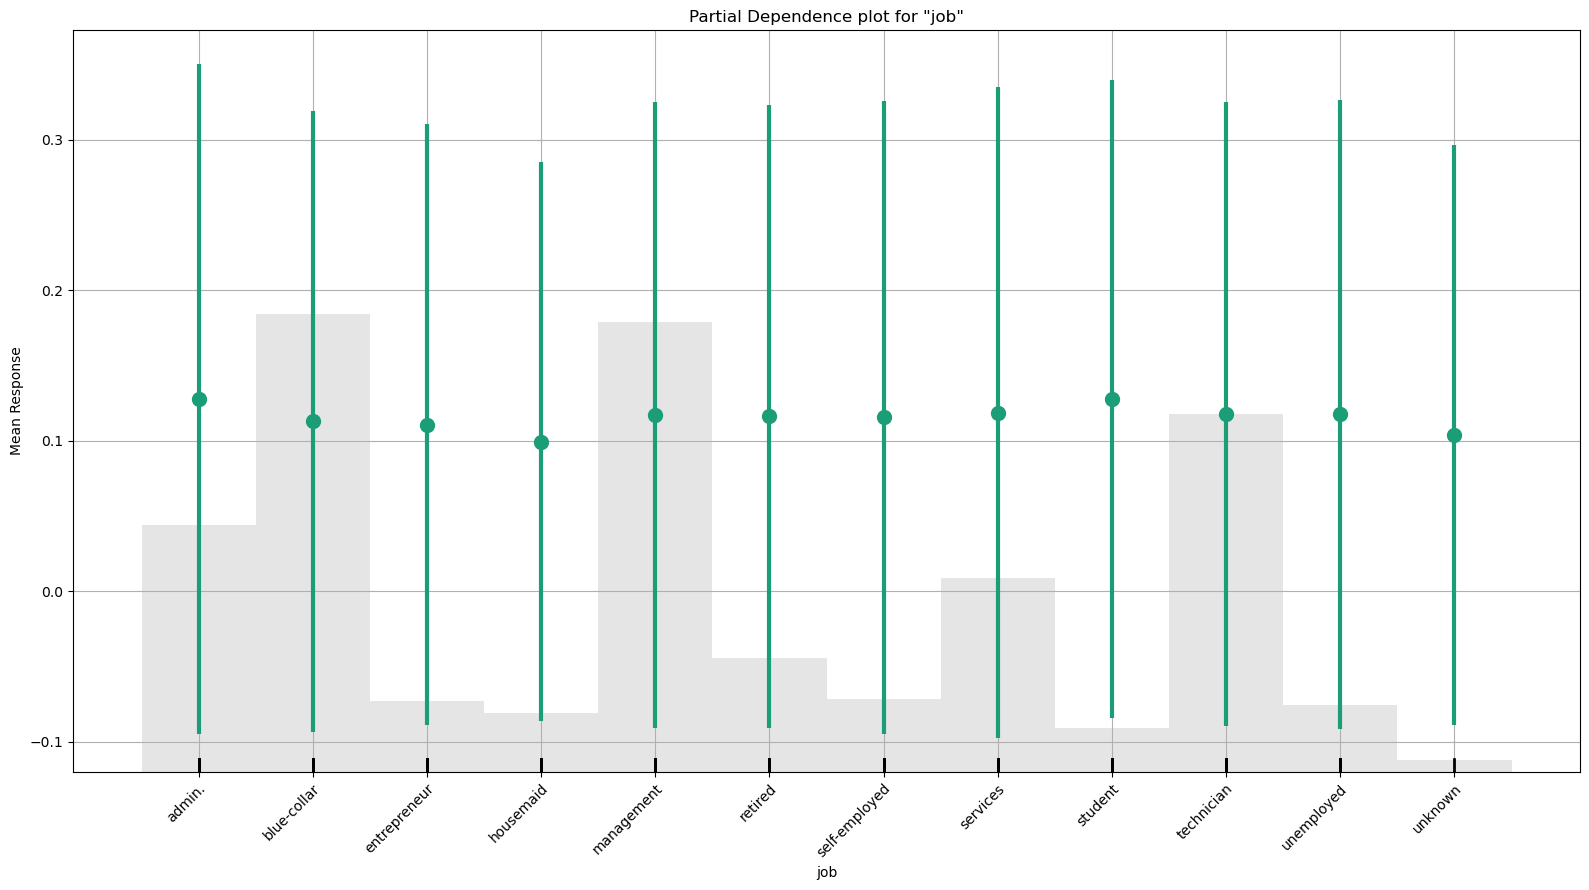

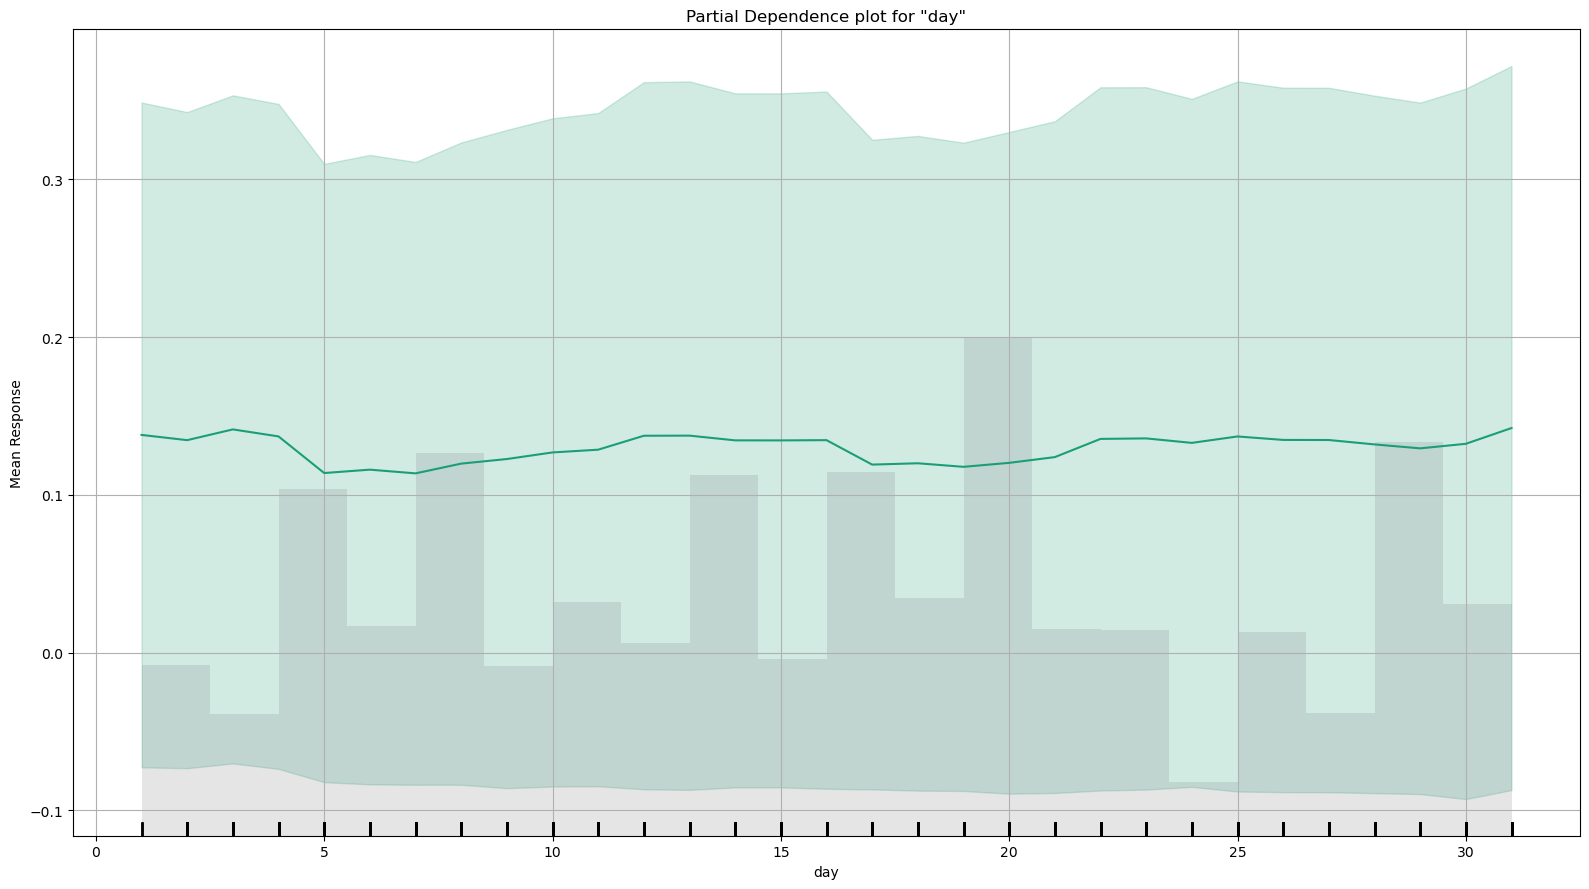

In [10]:
exa = aml.leader.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_1_20220916_181310


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21571789489442367: 


,,no,yes,Error,Rate
0,no,7088.0,771.0,0.0981,(771.0/7859.0)
1,yes,208.0,819.0,0.2025,(208.0/1027.0)
2,Total,7296.0,1590.0,0.1102,(979.0/8886.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

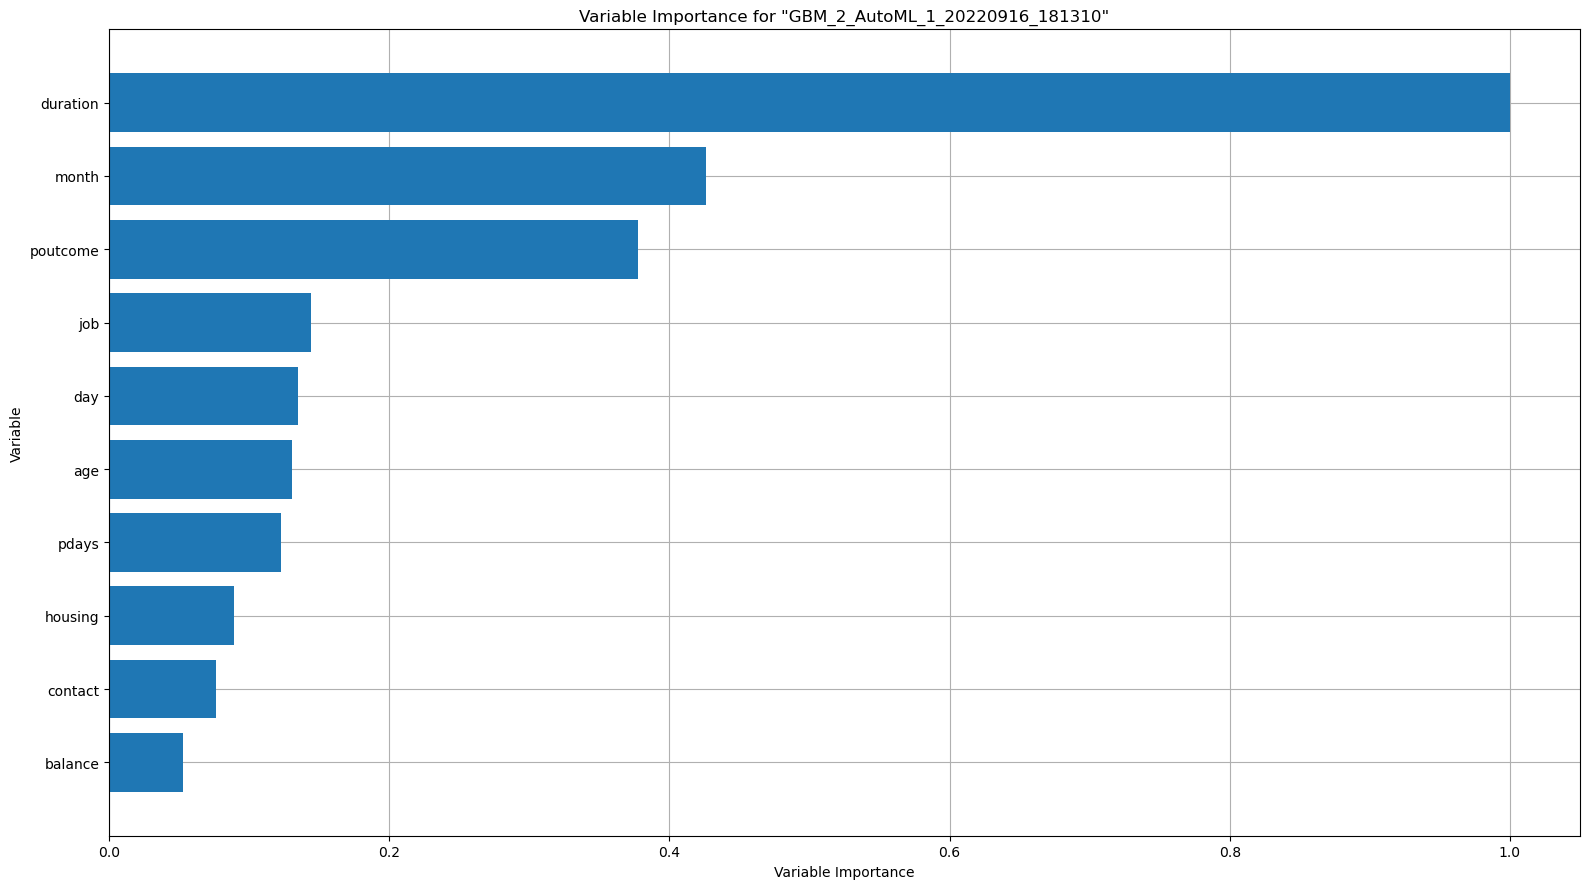

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

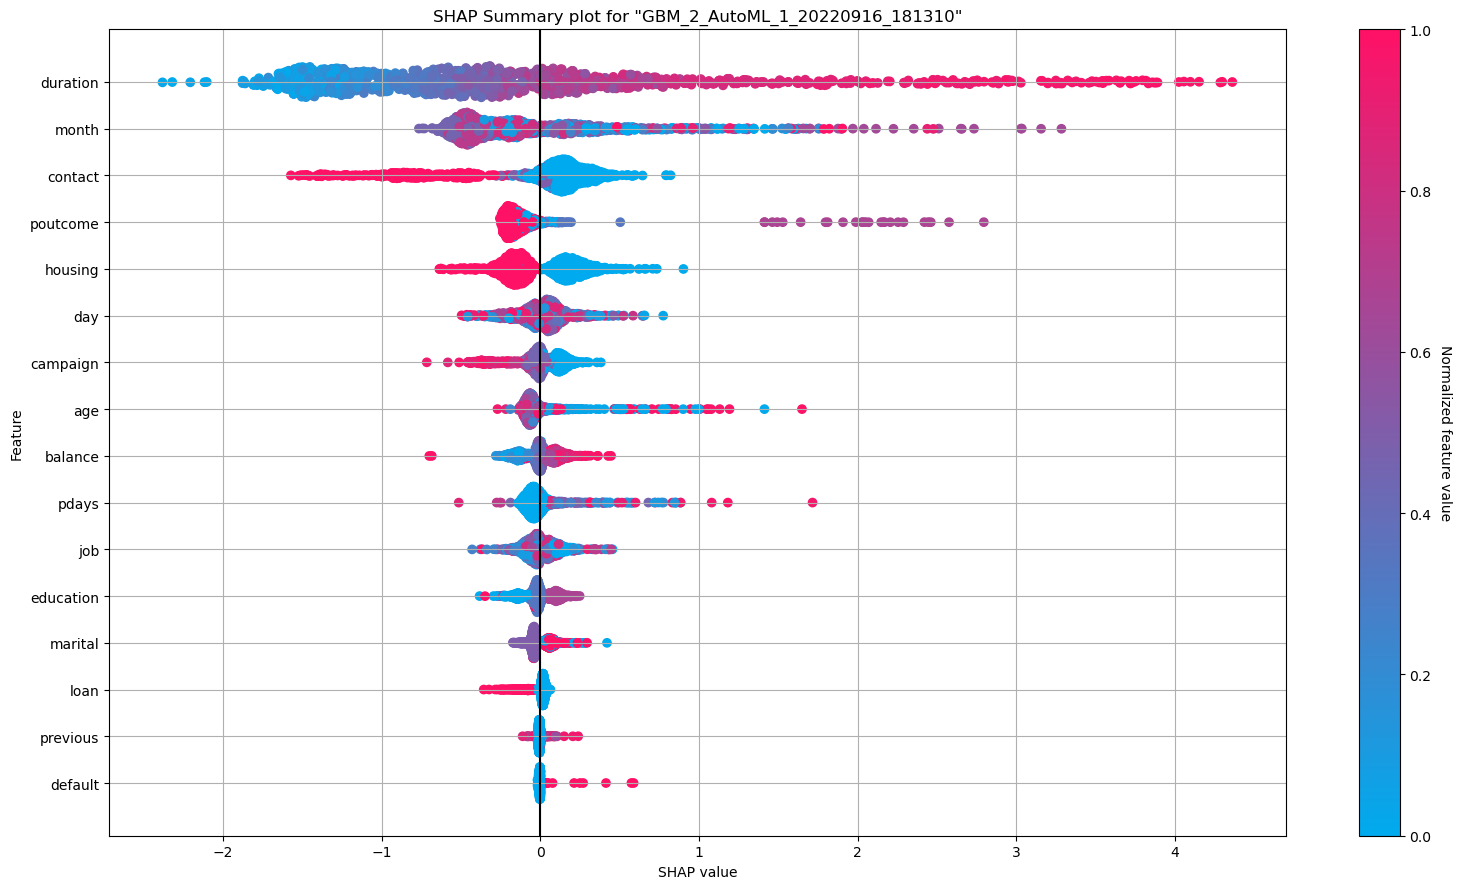

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

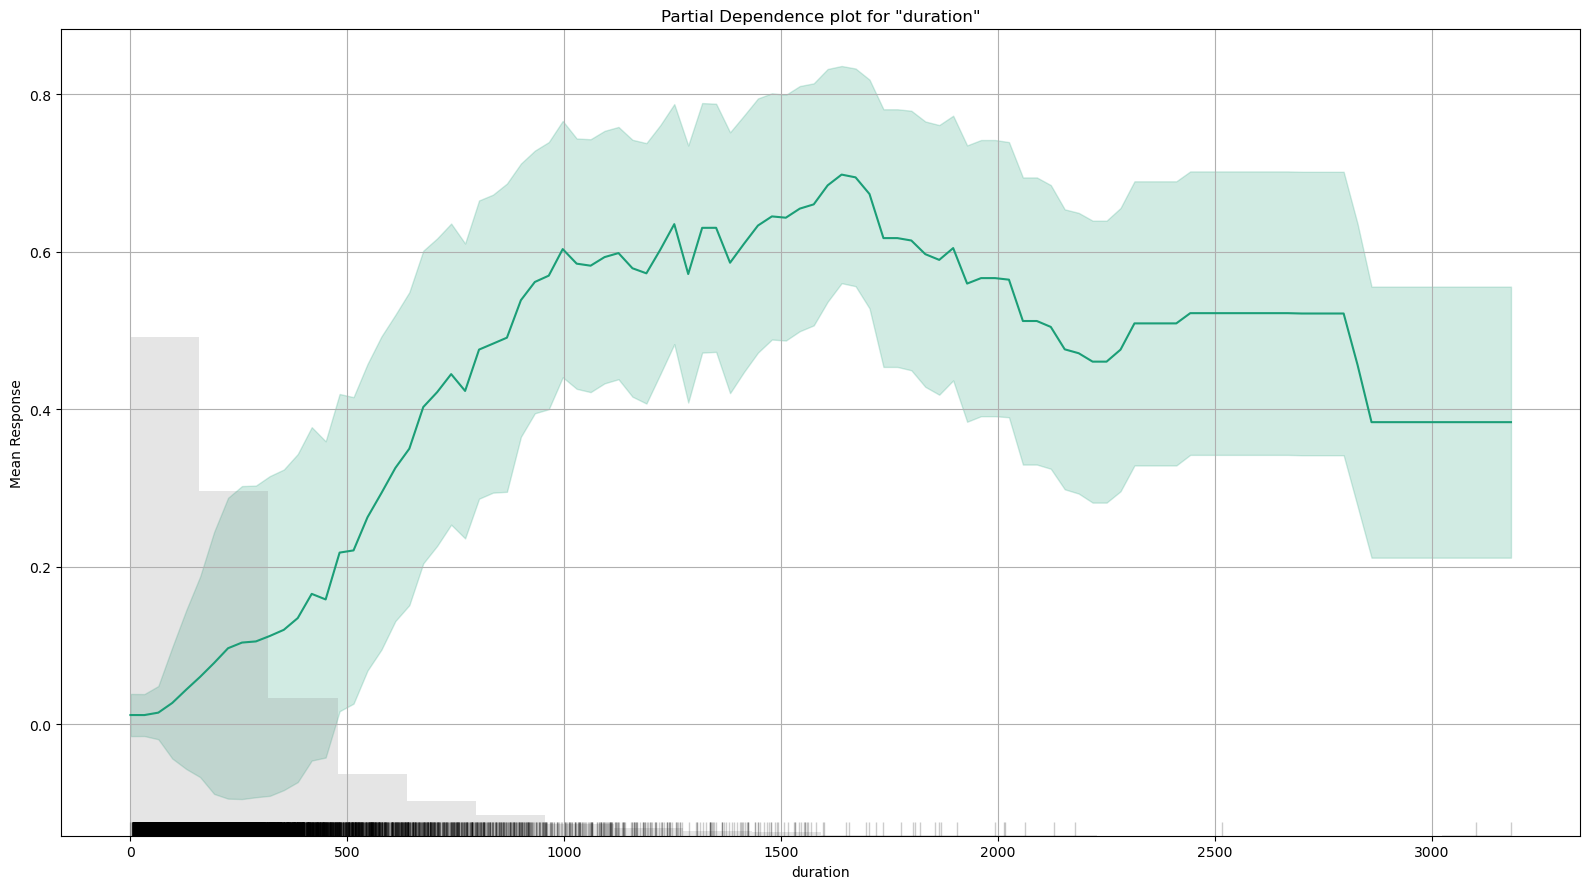

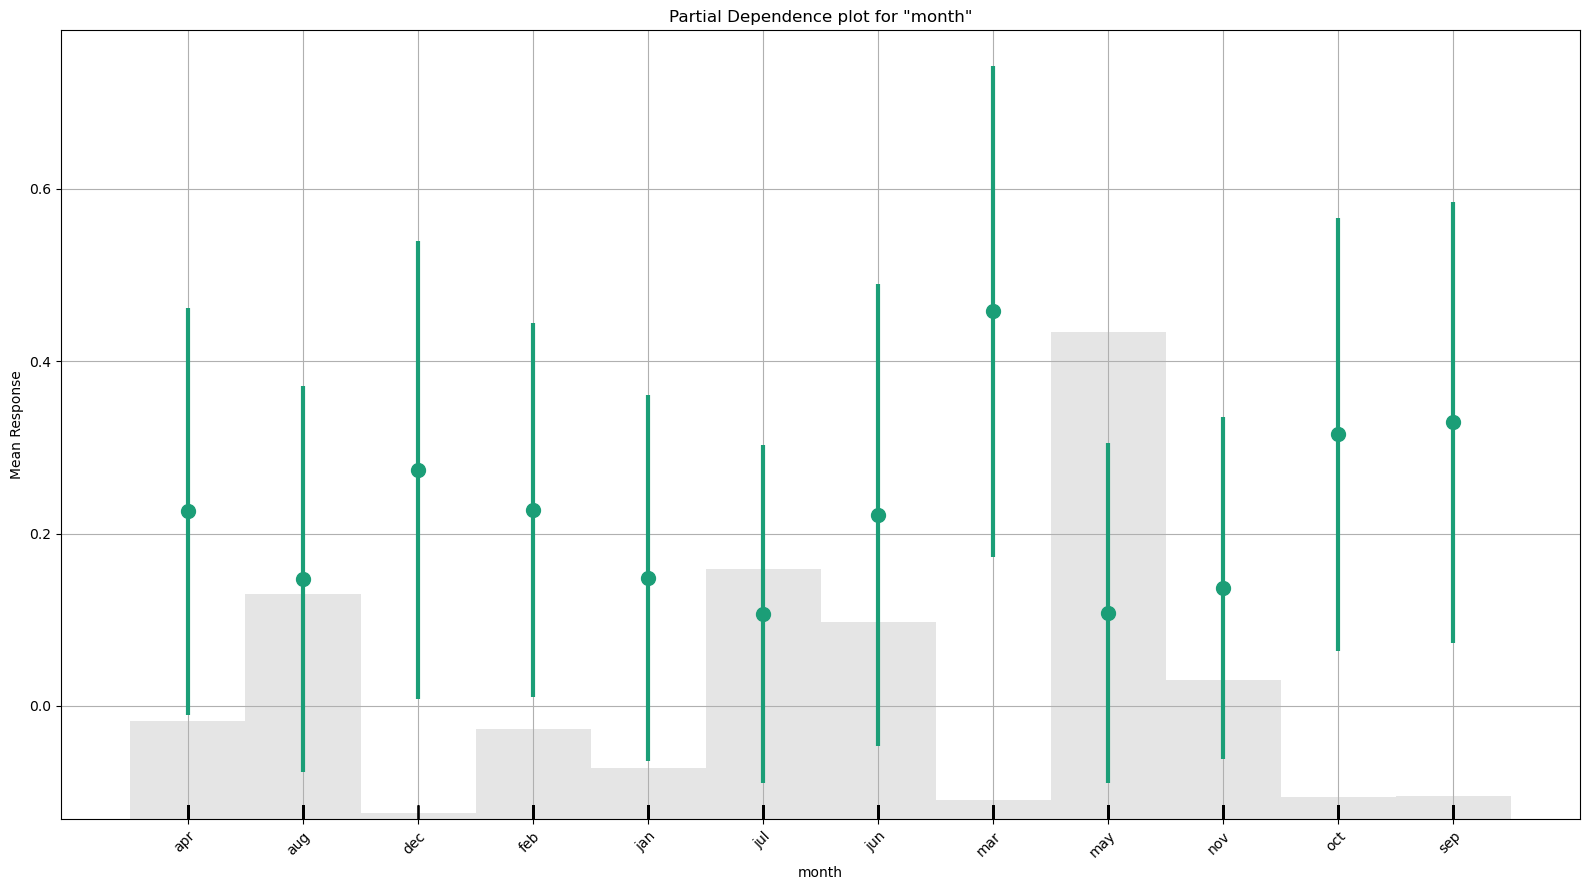

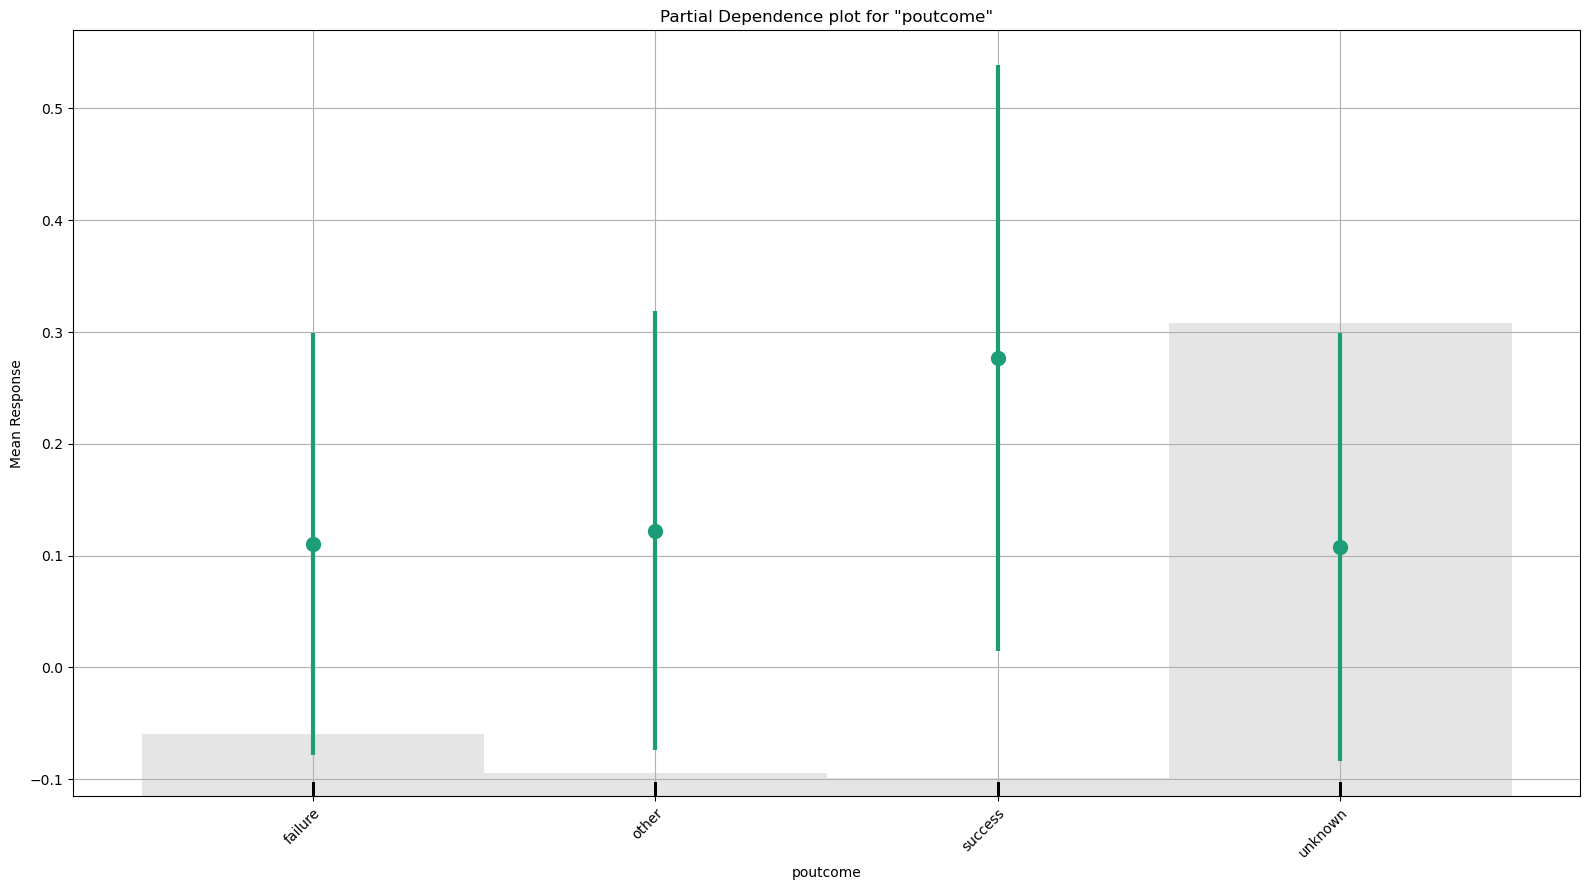

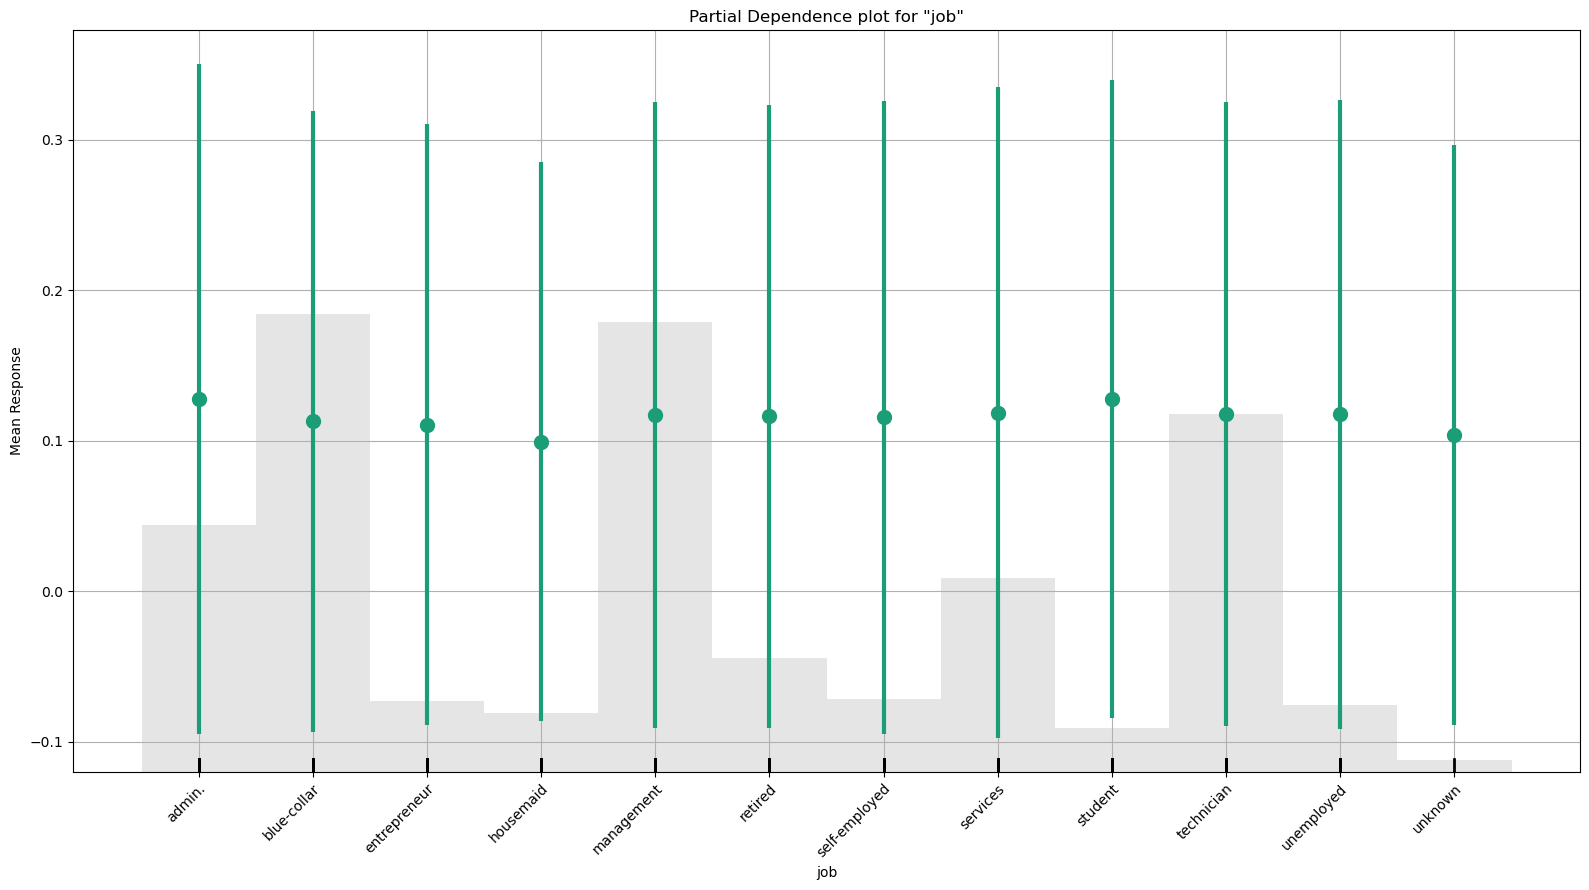

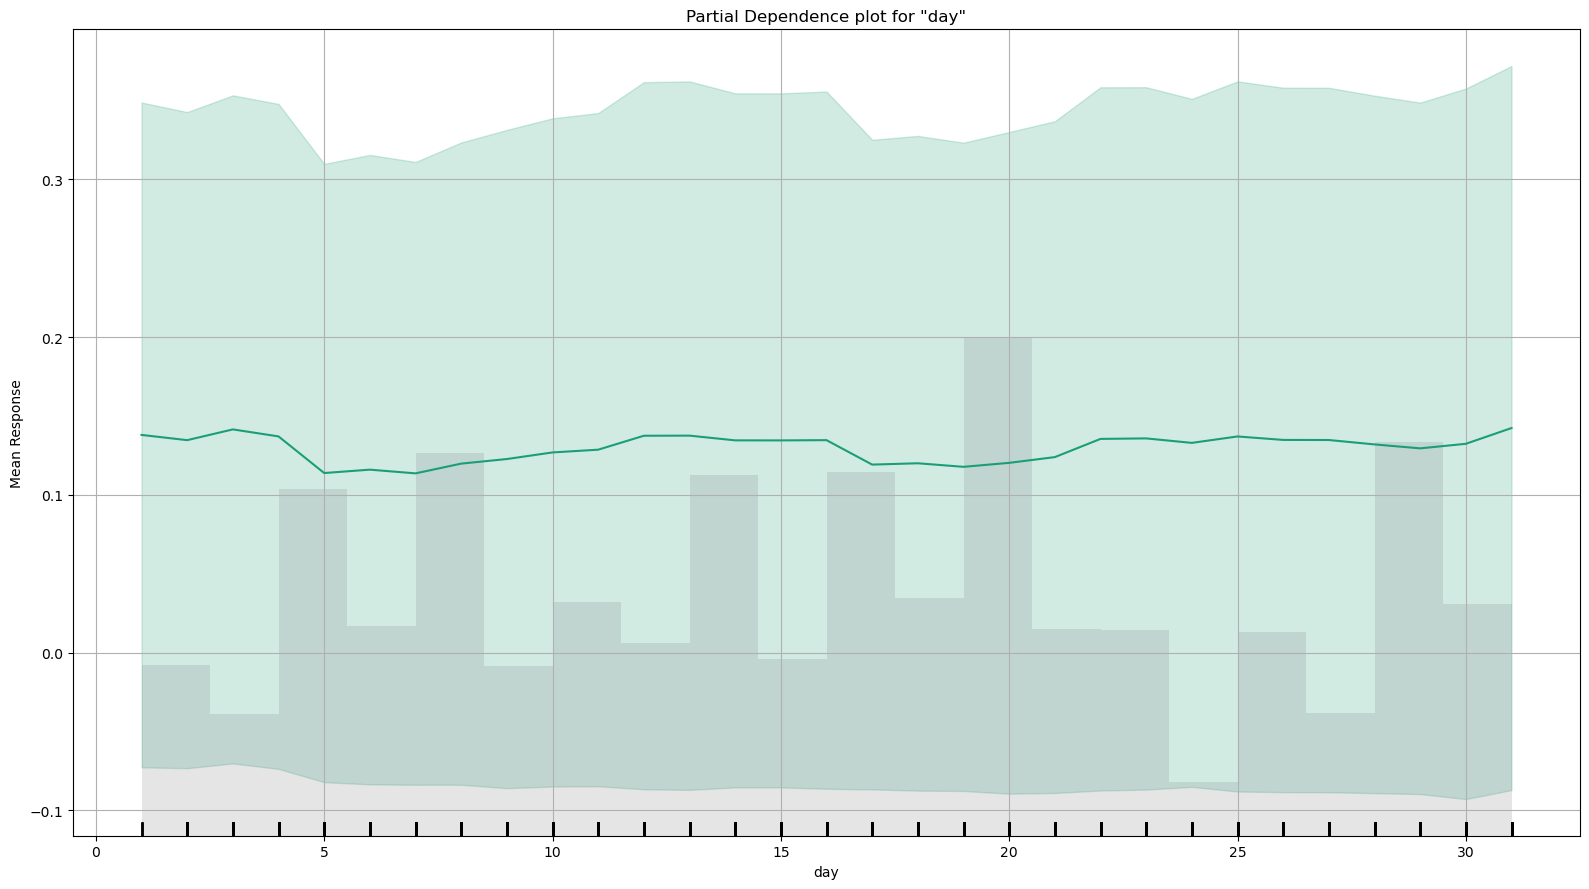

In [11]:
# Descripcion del mejor modelo obtenido
exa = aml.leader.explain(test)

In [12]:
# Performande del mejor modelo
aml.leader.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06299616132604455
RMSE: 0.2509903610221806
LogLoss: 0.2009486917142679
Mean Per-Class Error: 0.1503178650293705
AUC: 0.9323384411697255
AUCPR: 0.6088335101707779
Gini: 0.8646768823394511

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21571789489442367: 


,,no,yes,Error,Rate
0,no,7088.0,771.0,0.0981,(771.0/7859.0)
1,yes,208.0,819.0,0.2025,(208.0/1027.0)
2,Total,7296.0,1590.0,0.1102,(979.0/8886.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.215718,0.625908,239.0
1,max f2,0.100072,0.732499,297.0
2,max f0point5,0.526149,0.598367,127.0
3,max accuracy,0.558414,0.908845,116.0
4,max precision,0.967364,1.000000,0.0
5,max recall,0.004049,1.000000,395.0
6,max specificity,0.967364,1.000000,0.0
7,max absolute_mcc,0.215718,0.583353,239.0
8,max min_per_class_accuracy,0.134367,0.862323,277.0
9,max mean_per_class_accuracy,0.100072,0.868842,297.0



Gains/Lift Table: Avg response rate: 11,56 %, avg score: 11,67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010016,0.863904,6.416376,6.416376,0.741573,0.899428,0.741573,0.899428,0.064265,0.064265,541.637583,541.637583,0.061338
1,2,0.020032,0.791247,6.416376,6.416376,0.741573,0.823171,0.741573,0.861299,0.064265,0.128530,541.637583,541.637583,0.122677
2,3,0.030047,0.746785,6.513594,6.448782,0.752809,0.766748,0.745318,0.829782,0.065239,0.193768,551.359365,544.878177,0.185116
3,4,0.040063,0.701614,5.735851,6.270549,0.662921,0.727536,0.724719,0.804221,0.057449,0.251217,473.585112,527.054911,0.238747
4,5,0.050079,0.656752,5.055326,6.027505,0.584270,0.681053,0.696629,0.779587,0.050633,0.301850,405.532641,502.750457,0.284672
5,6,0.100045,0.458464,4.560041,5.294598,0.527027,0.551175,0.611924,0.665510,0.227848,0.529698,356.004105,429.459816,0.485799
6,7,0.150011,0.293013,3.527211,4.705911,0.407658,0.377460,0.543886,0.569565,0.176241,0.705940,252.721124,370.591114,0.628576
7,8,0.200090,0.171289,2.508220,4.155870,0.289888,0.227456,0.480315,0.483941,0.125609,0.831548,150.821964,315.587024,0.713976
8,9,0.300023,0.058314,1.101036,3.138356,0.127252,0.103692,0.362716,0.357287,0.110029,0.941577,10.103555,213.835591,0.725392
9,10,0.400068,0.027453,0.379576,2.448467,0.043870,0.039566,0.282982,0.277834,0.037975,0.979552,-62.042403,144.846692,0.655211


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
GBM_2_AutoML_1_20220916_181310,0.936287,0.197996,0.627557,0.165004,0.24906,0.0620308,1884,0.022353,GBM,no,0.994632,0.0053676
GBM_1_AutoML_1_20220916_181310,0.935715,0.196535,0.627725,0.177184,0.248769,0.0618861,2972,0.026806,GBM,no,0.990051,0.00994857
GBM_5_AutoML_1_20220916_181310,0.93535,0.199169,0.623548,0.16204,0.249654,0.062327,1760,0.01851,GBM,no,0.99257,0.00743031
GBM_3_AutoML_1_20220916_181310,0.934704,0.200842,0.617965,0.17181,0.25094,0.0629711,1747,0.019608,GBM,no,0.993864,0.00613643
GBM_4_AutoML_1_20220916_181310,0.934134,0.202667,0.613685,0.157452,0.252139,0.063574,2228,0.016627,GBM,no,0.993475,0.00652491
DRF_1_AutoML_1_20220916_181310,0.930202,0.204337,0.612975,0.166656,0.251077,0.0630396,2737,0.024465,DRF,no,1,0
XRT_1_AutoML_1_20220916_181310,0.928996,0.216469,0.607816,0.175727,0.254218,0.0646267,2550,0.023611,DRF,no,0.900152,0.0998483
GLM_1_AutoML_1_20220916_181310,0.906383,0.240828,0.550829,0.202818,0.266819,0.0711922,1253,0.001305,GLM,no,0.984533,0.0154667
DeepLearning_1_AutoML_1_20220916_181310,0.892094,0.279592,0.52181,0.238934,0.277895,0.0772258,1261,0.006509,DeepLearning,no,0.996408,0.00359225


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

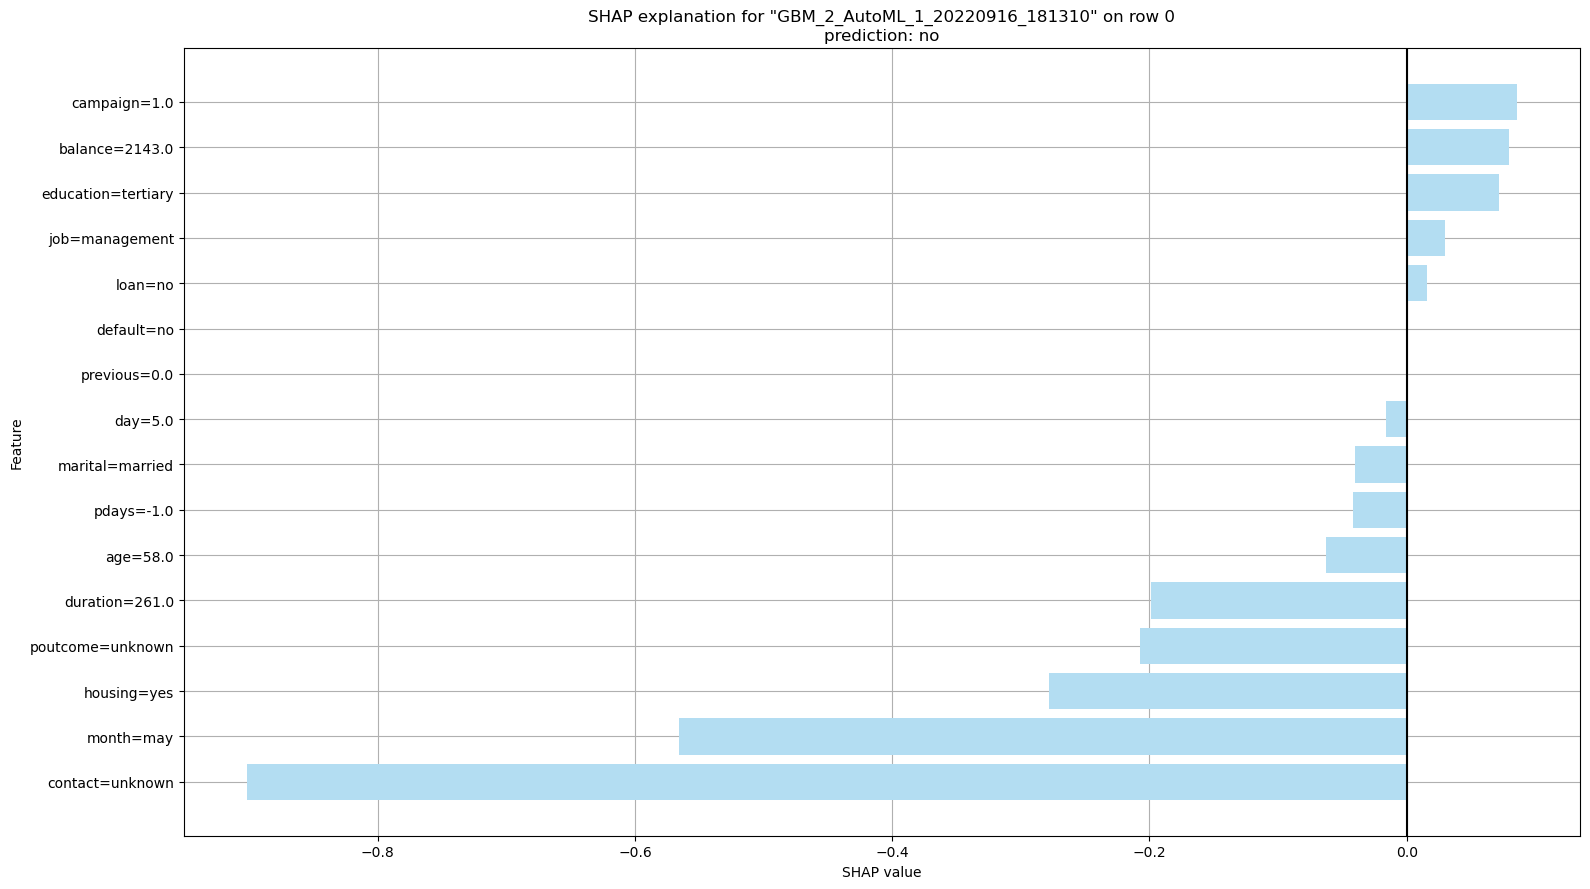

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,no,yes
GBM_2_AutoML_1_20220916_181310,0.936287,0.197996,0.627557,0.165004,0.24906,0.0620308,1884,0.022353,GBM,no,0.994632,0.0053676
GBM_1_AutoML_1_20220916_181310,0.935715,0.196535,0.627725,0.177184,0.248769,0.0618861,2972,0.026806,GBM,no,0.990051,0.00994857
GBM_5_AutoML_1_20220916_181310,0.93535,0.199169,0.623548,0.16204,0.249654,0.062327,1760,0.01851,GBM,no,0.99257,0.00743031
GBM_3_AutoML_1_20220916_181310,0.934704,0.200842,0.617965,0.17181,0.25094,0.0629711,1747,0.019608,GBM,no,0.993864,0.00613643
GBM_4_AutoML_1_20220916_181310,0.934134,0.202667,0.613685,0.157452,0.252139,0.063574,2228,0.016627,GBM,no,0.993475,0.00652491
DRF_1_AutoML_1_20220916_181310,0.930202,0.204337,0.612975,0.166656,0.251077,0.0630396,2737,0.024465,DRF,no,1,0
XRT_1_AutoML_1_20220916_181310,0.928996,0.216469,0.607816,0.175727,0.254218,0.0646267,2550,0.023611,DRF,no,0.900152,0.0998483
GLM_1_AutoML_1_20220916_181310,0.906383,0.240828,0.550829,0.202818,0.266819,0.0711922,1253,0.001305,GLM,no,0.984533,0.0154667
DeepLearning_1_AutoML_1_20220916_181310,0.892094,0.279592,0.52181,0.238934,0.277895,0.0772258,1261,0.006509,DeepLearning,no,0.996408,0.00359225


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [13]:
# Descripcion de la prediccion de un ejemplo
aml.explain_row(test, row_index=0)

# Referencias
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-parameters